In [1]:
from rbf import Approximator1D as oned, Approximator2D as twod
from rbf_adaptive import EfficientApproximator1D as efoned, AdaptiveApproximator1D as ada, TimedApproximator1D as tapp
import numpy as np
import scipy.io as sio
import warnings

warnings.filterwarnings("ignore")

# Chapter 3

In [2]:
def f(x):
    return -2*(np.cos(x)**3) + 8*(np.sin(x)**2)*(np.cos(x))

def u(x):
    return (np.sin(x)**2)*np.cos(x)

def ux(x):
    return 2*(np.sin(x))*(np.cos(x)**2) - (np.sin(x)**3)

### N = 32

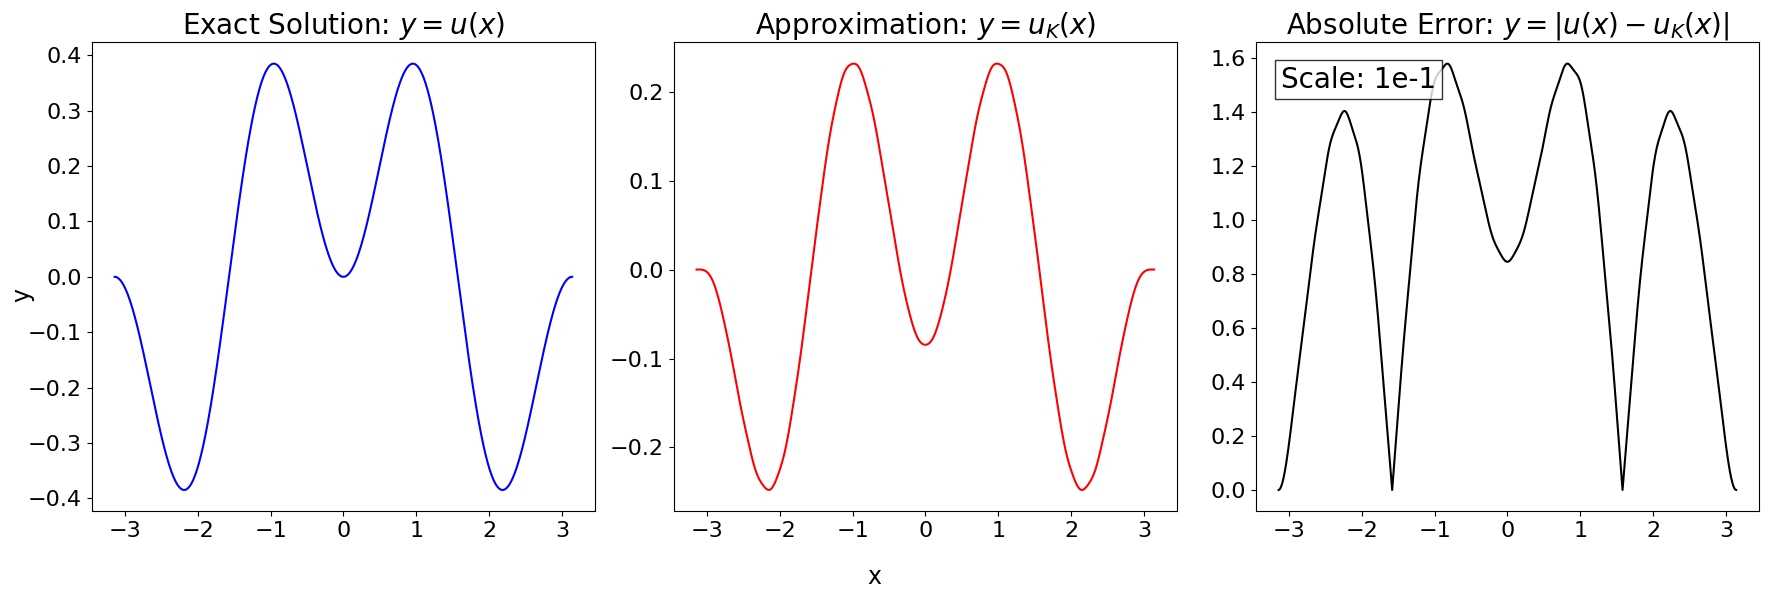

[98.52347001]


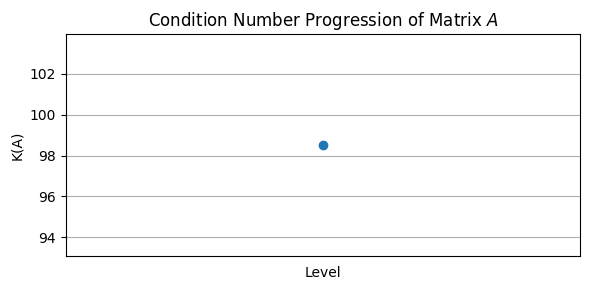

In [10]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [32], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = 64

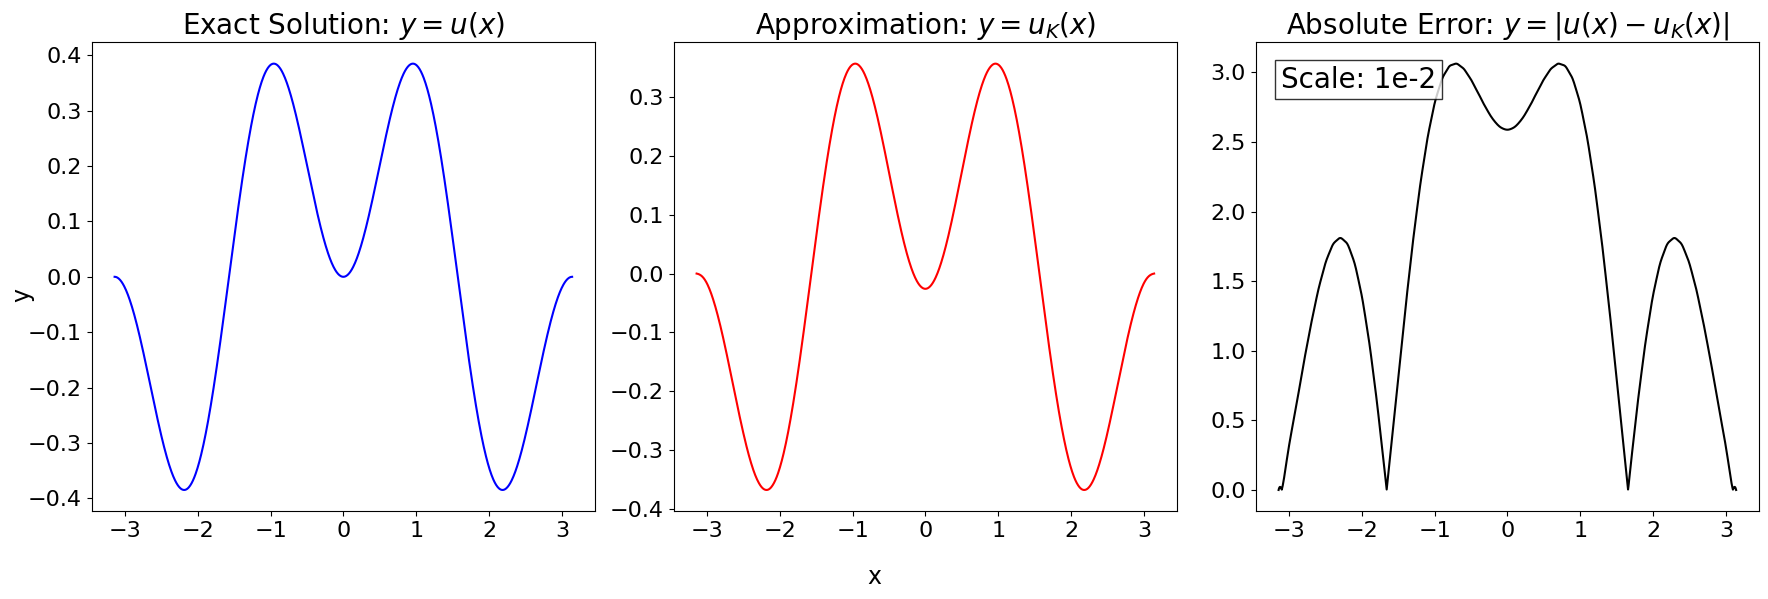

[164.13284691]


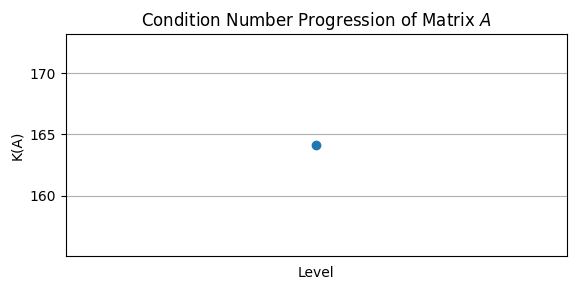

In [11]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [64], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = 128

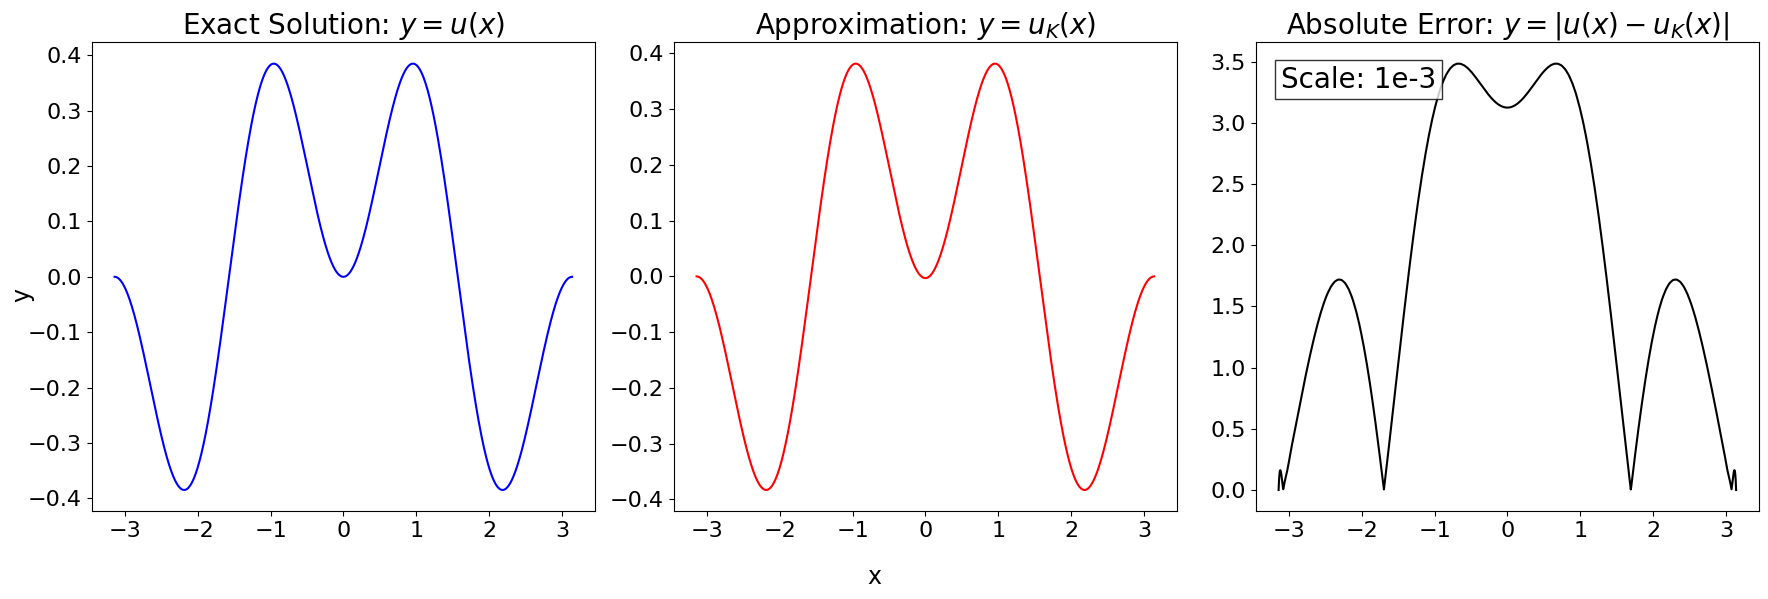

[667.9066752]


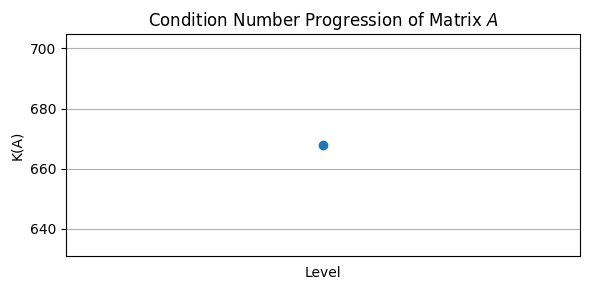

In [12]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [128], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = 256

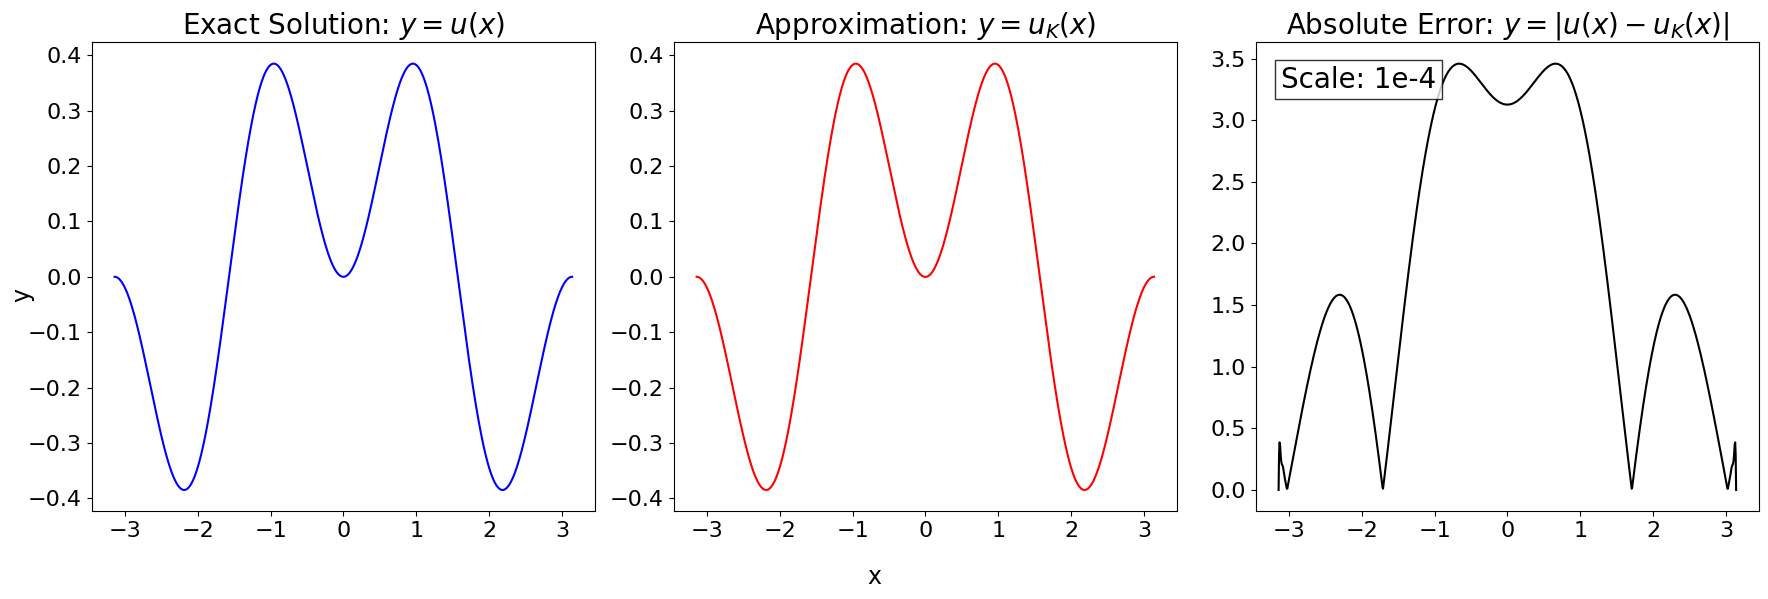

[3861.95054148]


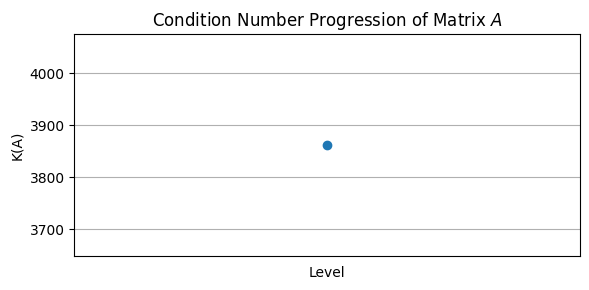

In [13]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [256], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = 512

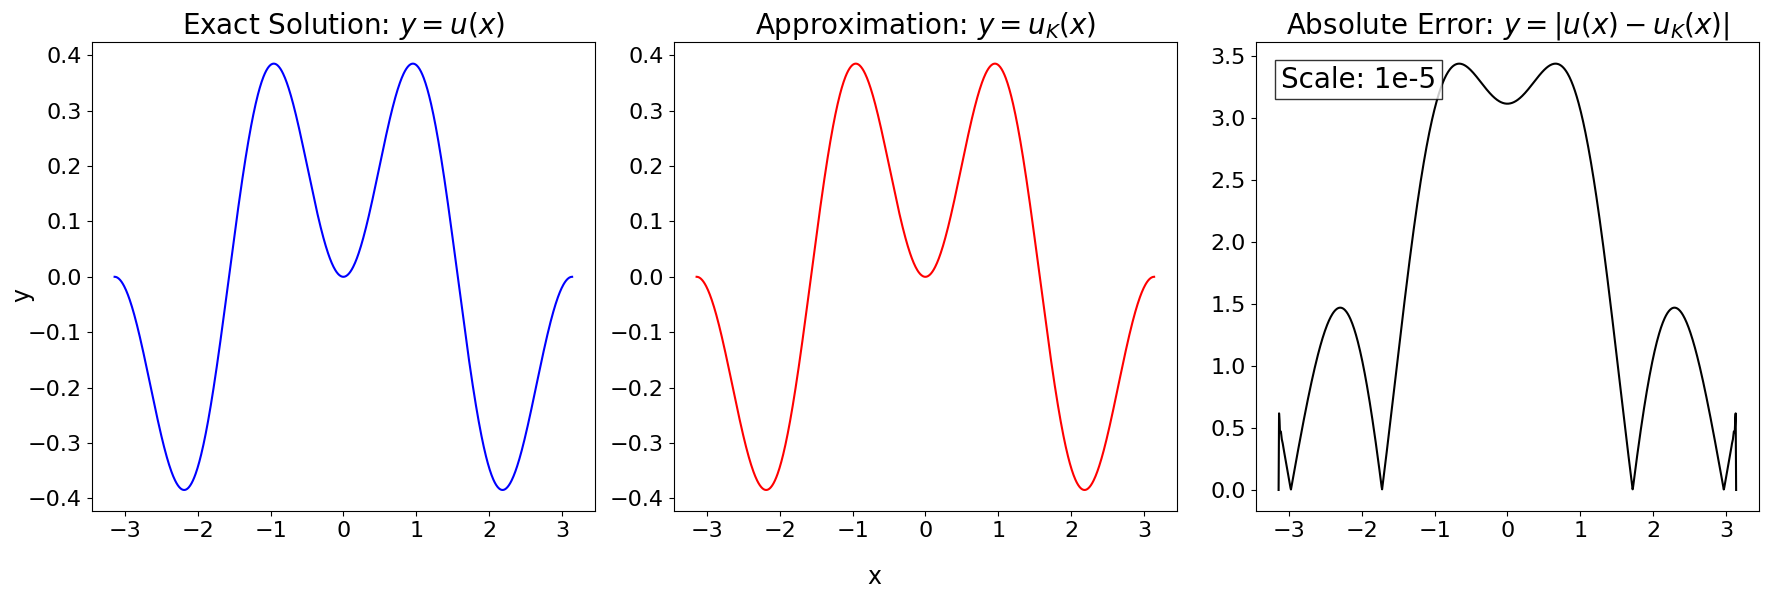

[28296.11070675]


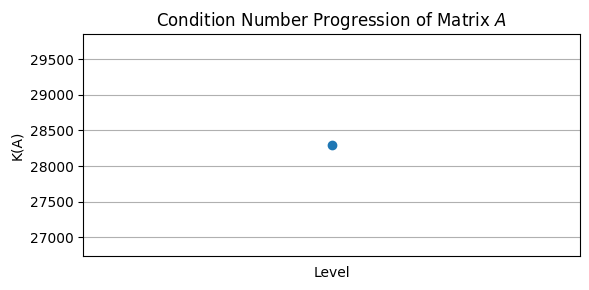

In [14]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [512], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = 1024

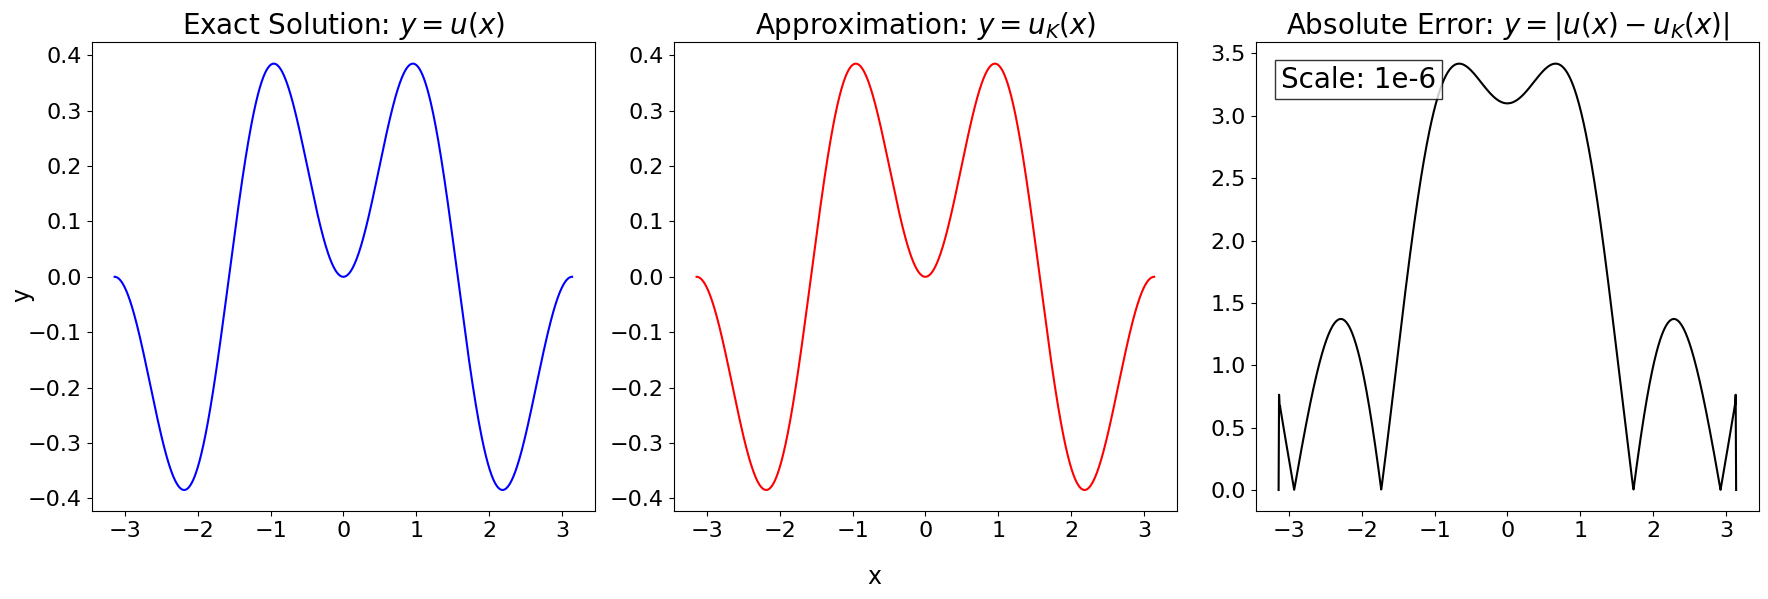

[277580.42005975]


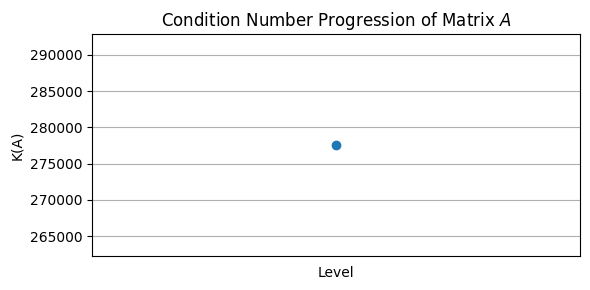

In [15]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [1024], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

### N = {32, 64, 128, 256, 512, 1024}

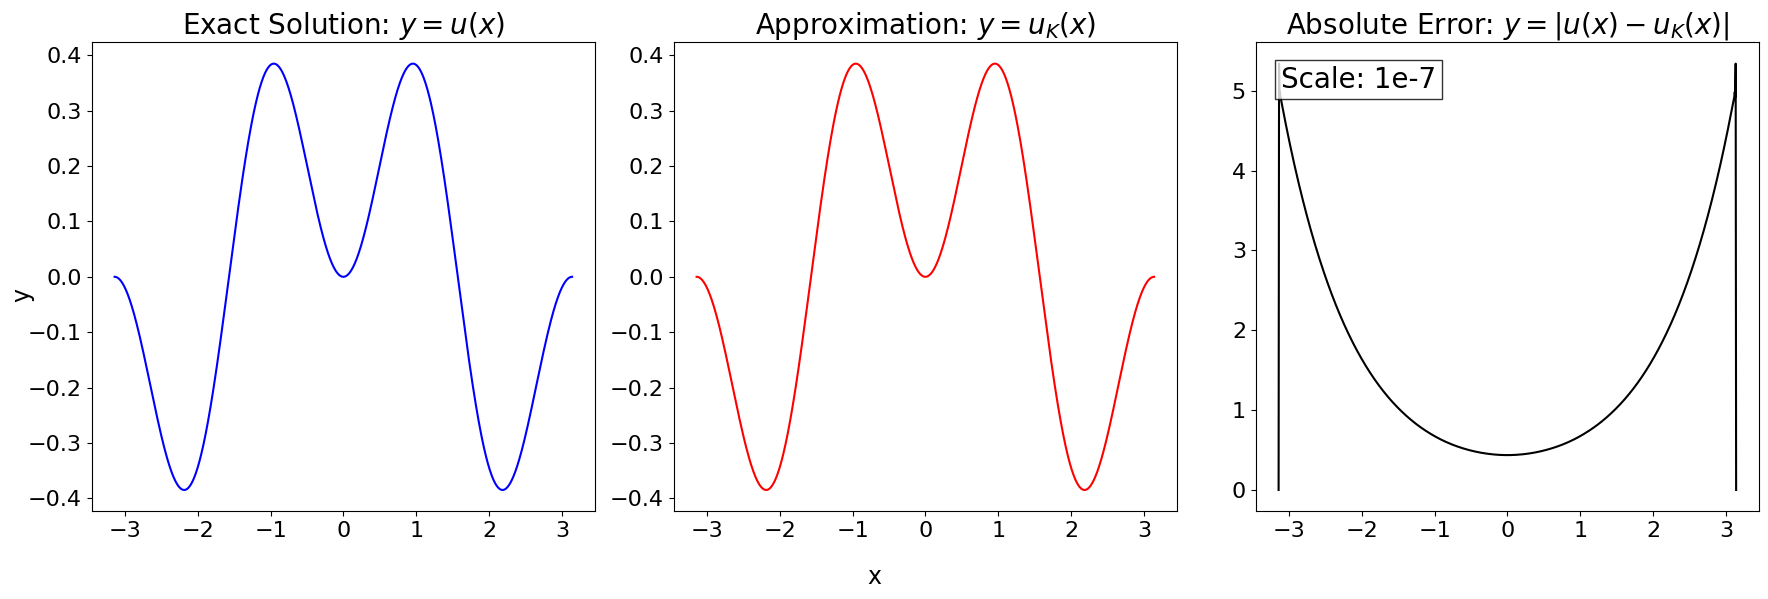

[9.85234700e+01 1.64132847e+02 6.67906675e+02 3.86195054e+03
 2.82961107e+04 2.77580420e+05]


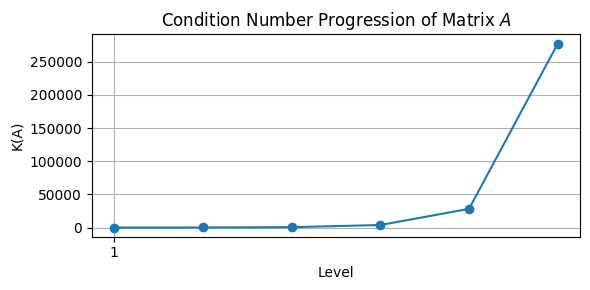

In [16]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [32, 64, 128, 256, 512, 1024], 1, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True, cn_plot=True)

# Chapter 4

## Grids

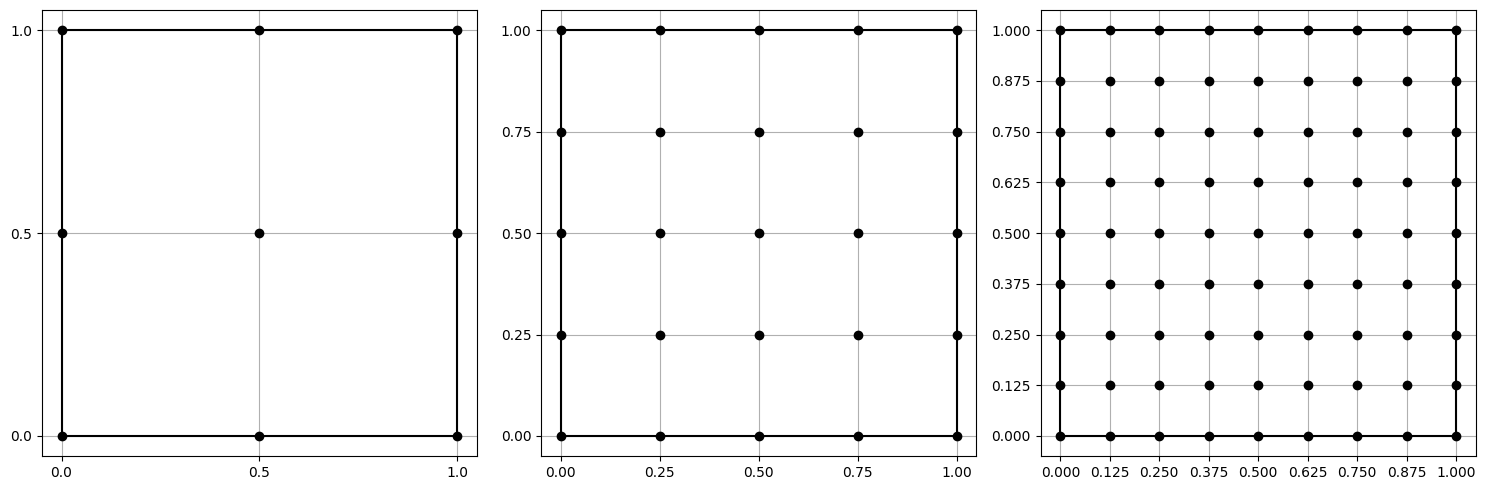

In [4]:
import matplotlib.pyplot as plt

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each subplot
for i, ax in enumerate(axs):
    # Plot the grid
    width = (2**(1+i))
    ticks = [j/width for j in range(int(width)+1)]

    ax.plot([0, 1], [0, 0], color='black')  # Horizontal line
    ax.plot([1, 1], [0, 1], color='black')  # Vertical line
    ax.plot([0, 1], [1, 1], color='black')  # Horizontal line
    ax.plot([0, 0], [0, 1], color='black')  # Vertical line
    
    # Set x and y limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    for n in range(len(ticks)):
        for m in range(len(ticks)):
            ax.plot(ticks[n], ticks[m], marker='o', color='black')
    
    # Hide axes
    ax.axis('on')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    # Show grid
    ax.grid(True)

plt.tight_layout()
plt.show()

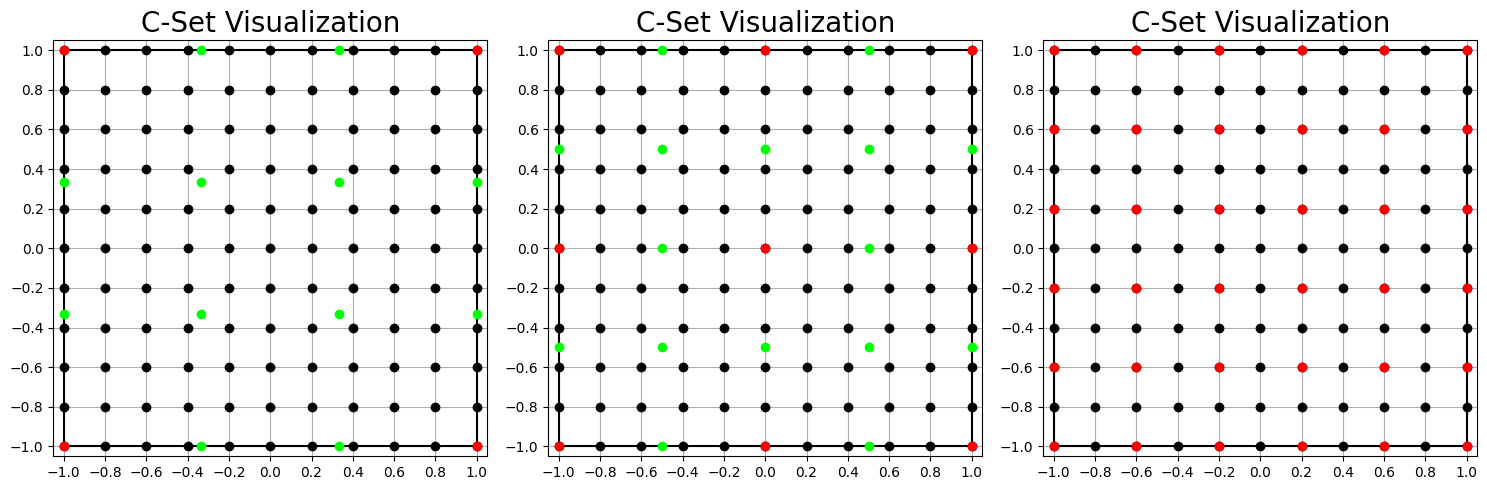

In [9]:
# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each subplot
for i, ax in enumerate(axs):
    # Plot the grid
    width = 5
    ticks = [-1 + j/width for j in range(int(2*width)+1)]
    
    # Set x and y limits
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)

    ax.plot([-1, 1], [-1, -1], color='black')  # Horizontal line
    ax.plot([1, 1], [-1, 1], color='black')  # Vertical line
    ax.plot([-1, 1], [1, 1], color='black')  # Horizontal line
    ax.plot([-1, -1], [-1, 1], color='black')  # Vertical line

    for n in range(len(ticks)):
        for m in range(len(ticks)):
            ax.plot(ticks[n], ticks[m], marker='o', color='black')

    if i == 0:
        w = 3/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                x, y = t[n], t[m]
                if (x==1 and y==1) or (x==1 and y==-1) or (x==-1 and  y==-1) or (x==-1 and y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                else:
                    ax.plot(t[n], t[m], marker='o', color='lime')
    if i ==1:
        w = 4/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                x, y = t[n], t[m]
                if (x==1 and y==1) or (x==1 and y==-1) or (x==-1 and  y==-1) or (x==-1 and y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                elif (x==0 and y==0) or (x==0 and y==-1) or (x==0 and  y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                elif (x==-1 and y==0) or (x==1 and  y==0):
                    ax.plot(t[n], t[m], marker='o', color='red')
                else:
                    ax.plot(t[n], t[m], marker='o', color='lime')
    if i ==2:
        w = 5/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                ax.plot(t[n], t[m], marker='o', color='red')
    
    # Hide axes
    ax.axis('on')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_title('C-Set Visualization', fontsize=20)
    
    # Show grid
    ax.grid(True)

plt.tight_layout()
plt.show()

## Nested Centers for Efficiency

In [2]:
def f(x):
    return 3 * (np.sin(x))**2 - 2 * (np.cos(x))**2

def u(x):
    return np.sin(x)**2

def u_prime(x):
    return 2*np.sin(x)*np.cos(x)

#### Up to 33

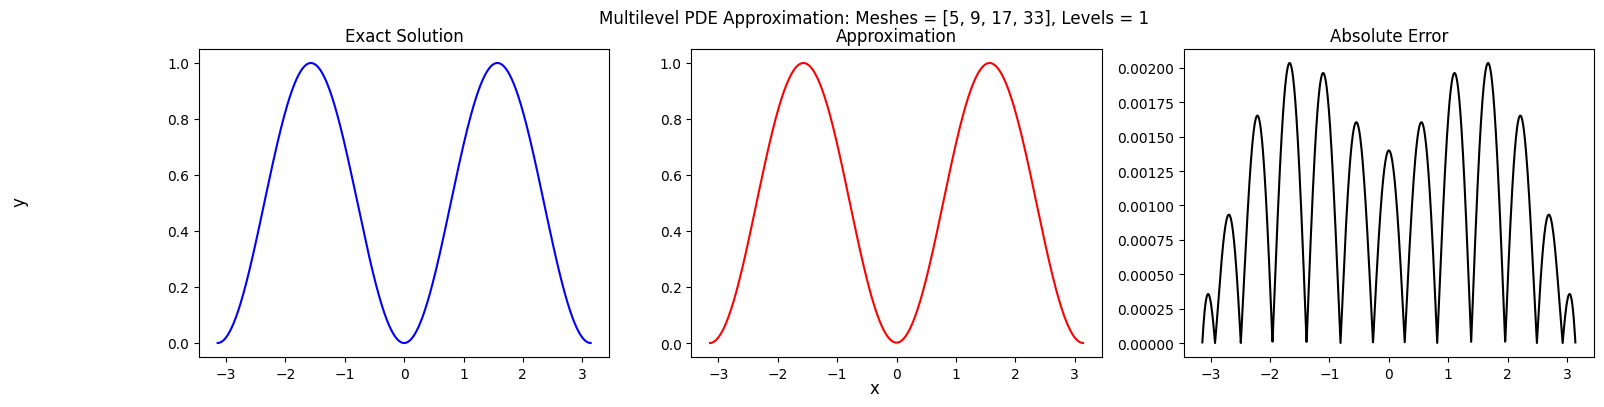

Start Time: 1713347524.037039
End Time: 1713347525.461919
Elapsed Time: 1.424880027770996 seconds


In [3]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33], 10, 1
ml = tapp(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

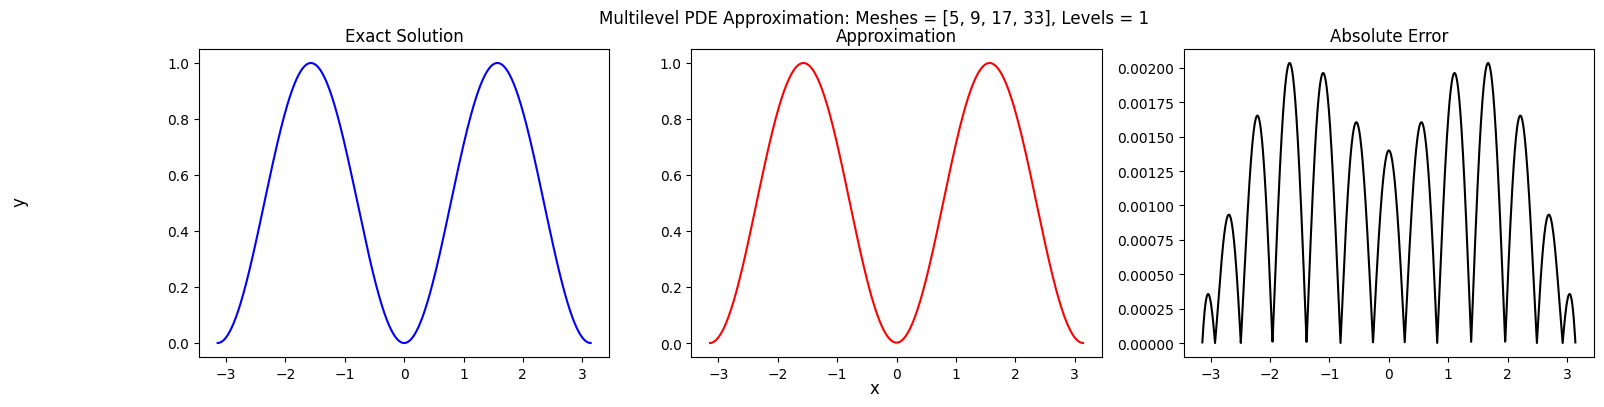

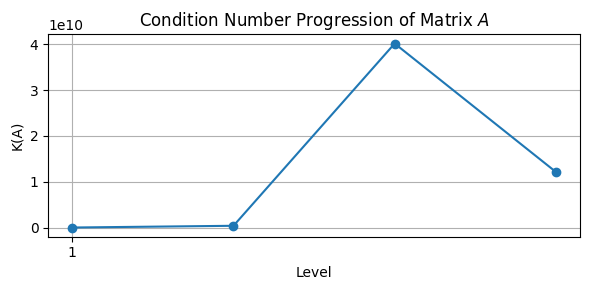

Start Time: 1713347534.139969
End Time: 1713347535.164621
Initialization Time: 0.2521951198577881
Elapsed Time: 1.2768471240997314 seconds


In [4]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33], 10, 1
ml = efoned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

#### Up to 65

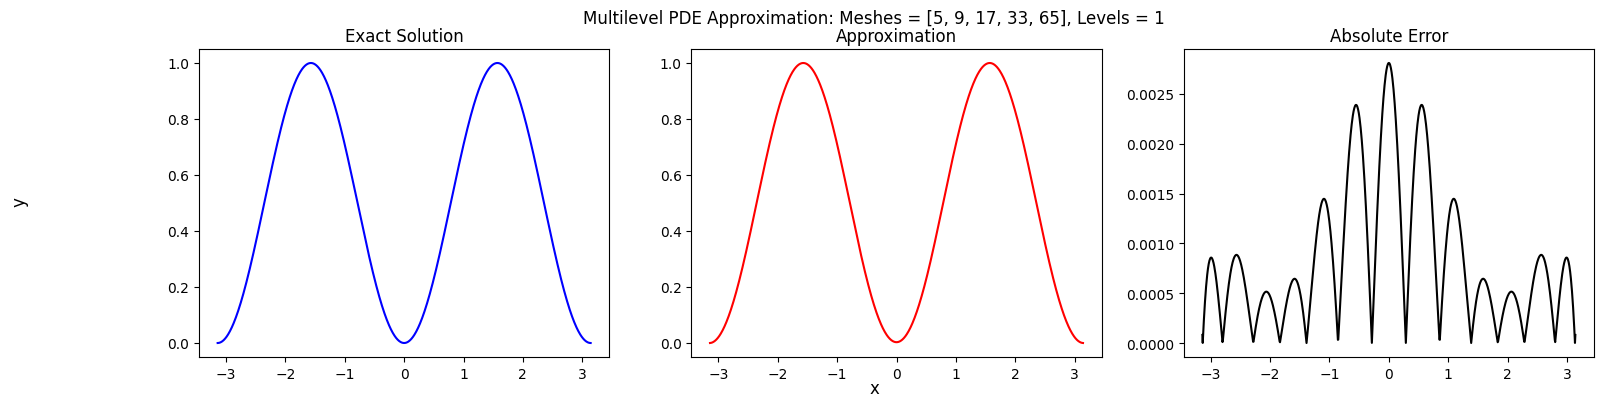

Start Time: 1713347743.043465
End Time: 1713347749.554004
Elapsed Time: 6.5105390548706055 seconds


In [5]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65], 10, 1
ml = tapp(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

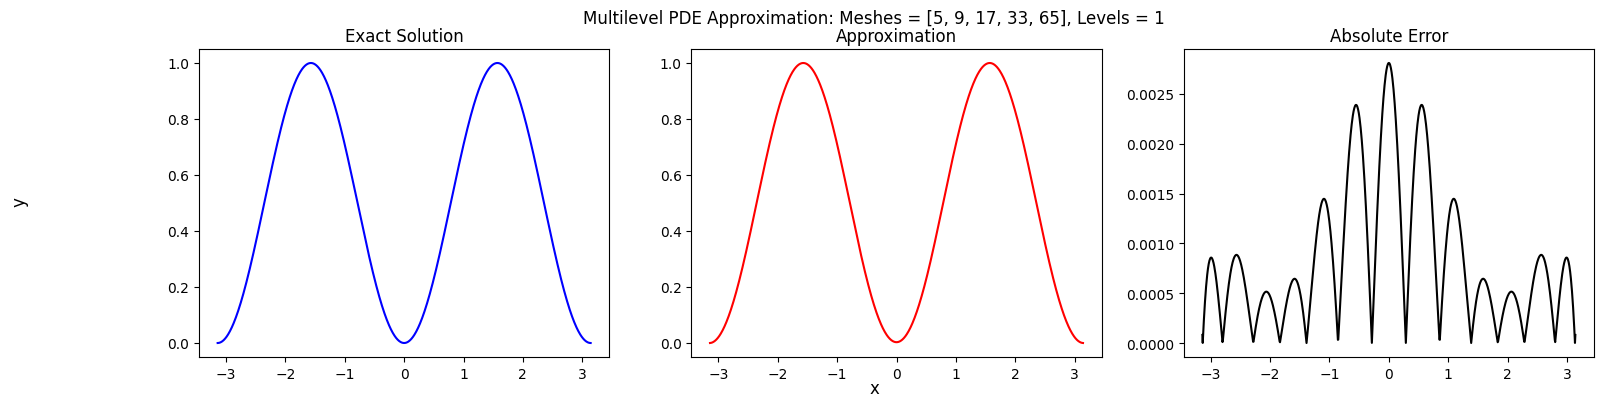

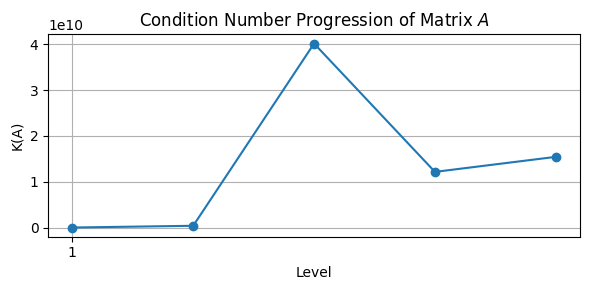

Start Time: 1713347785.274109
End Time: 1713347790.696855
Initialization Time: 0.8825809955596924
Elapsed Time: 6.3053271770477295 seconds


In [7]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65], 10, 1
ml = efoned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

#### Up to 129

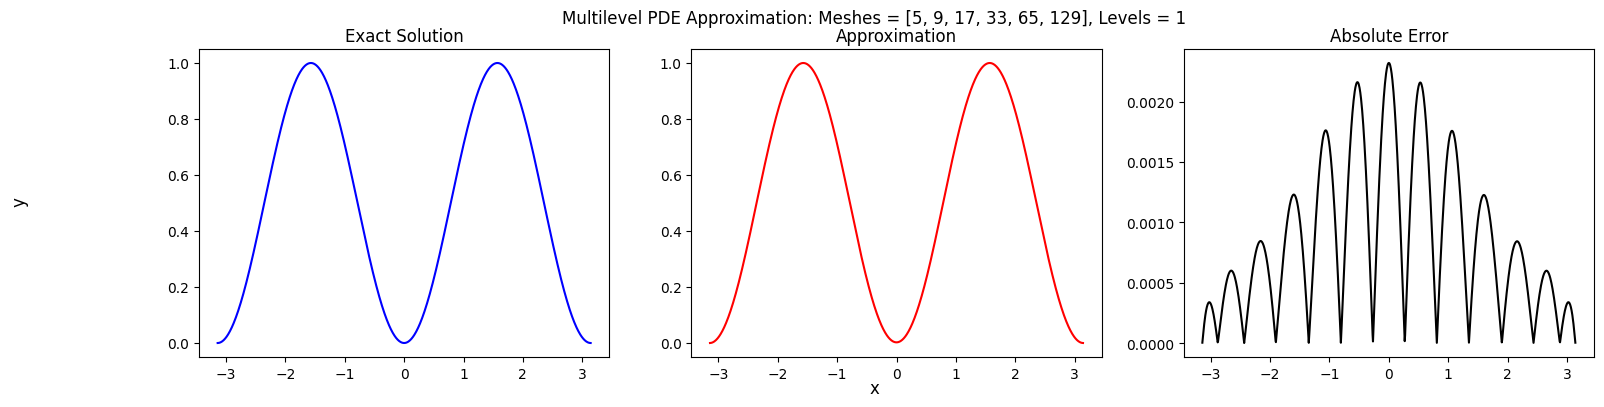

Start Time: 1713348102.620345
End Time: 1713348129.436633
Elapsed Time: 26.816287994384766 seconds


In [8]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65,129], 10, 1
ml = tapp(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

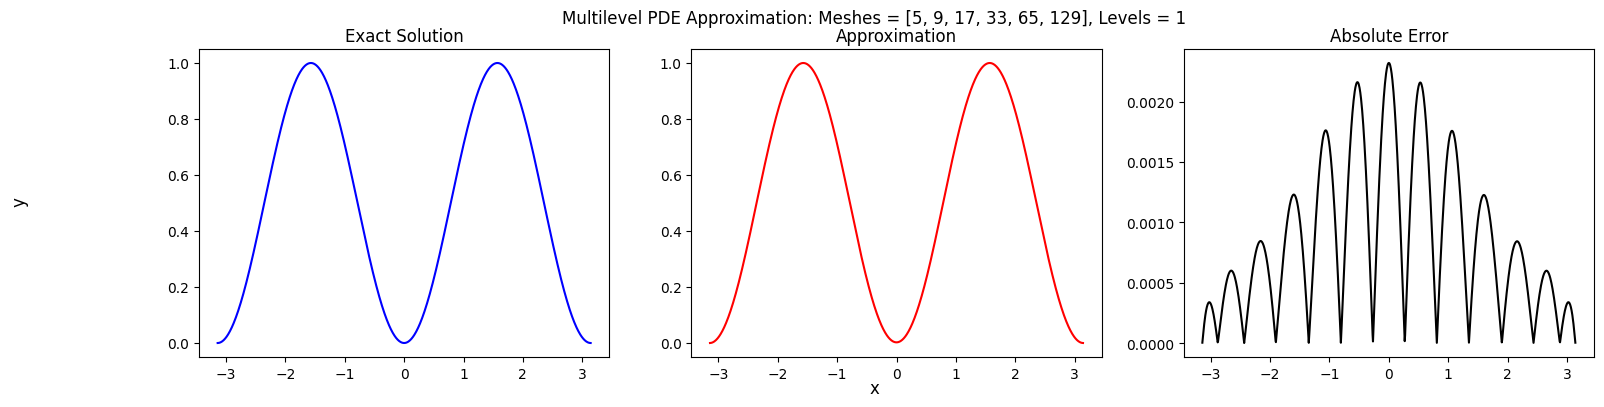

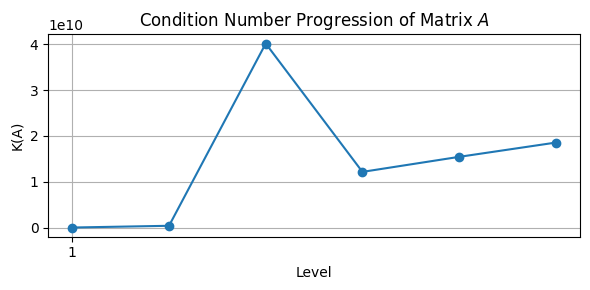

Start Time: 1713348142.14157
End Time: 1713348164.1004229
Initialization Time: 3.401561975479126
Elapsed Time: 25.360414743423462 seconds


In [9]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65,129], 10, 1
ml = efoned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

#### Up to 257

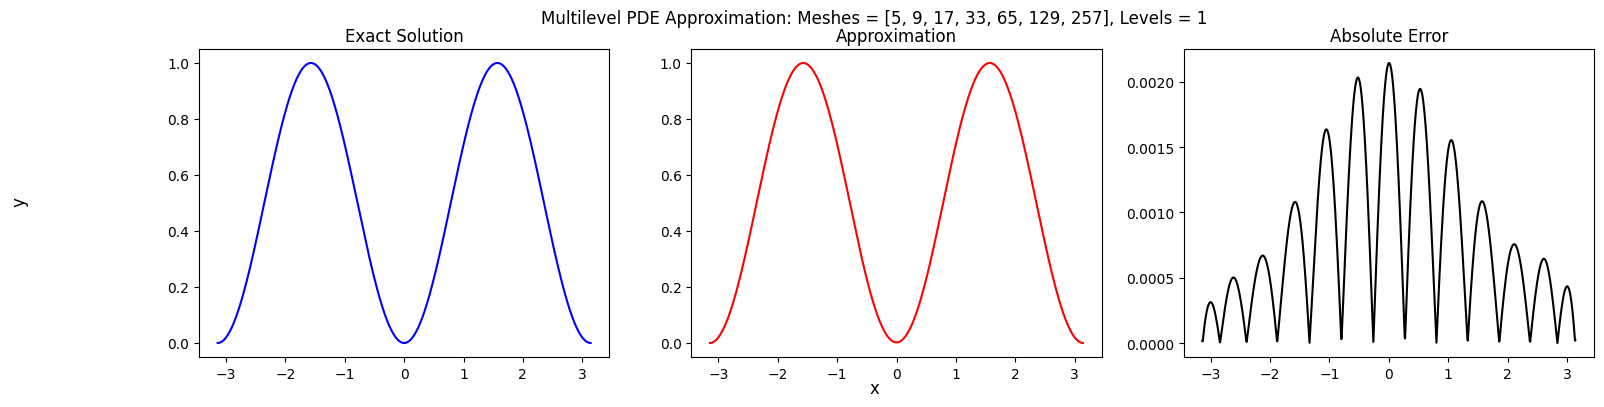

Start Time: 1713348255.7173
End Time: 1713348353.291486
Elapsed Time: 97.57418608665466 seconds


In [10]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65,129,257], 10, 1
ml = tapp(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

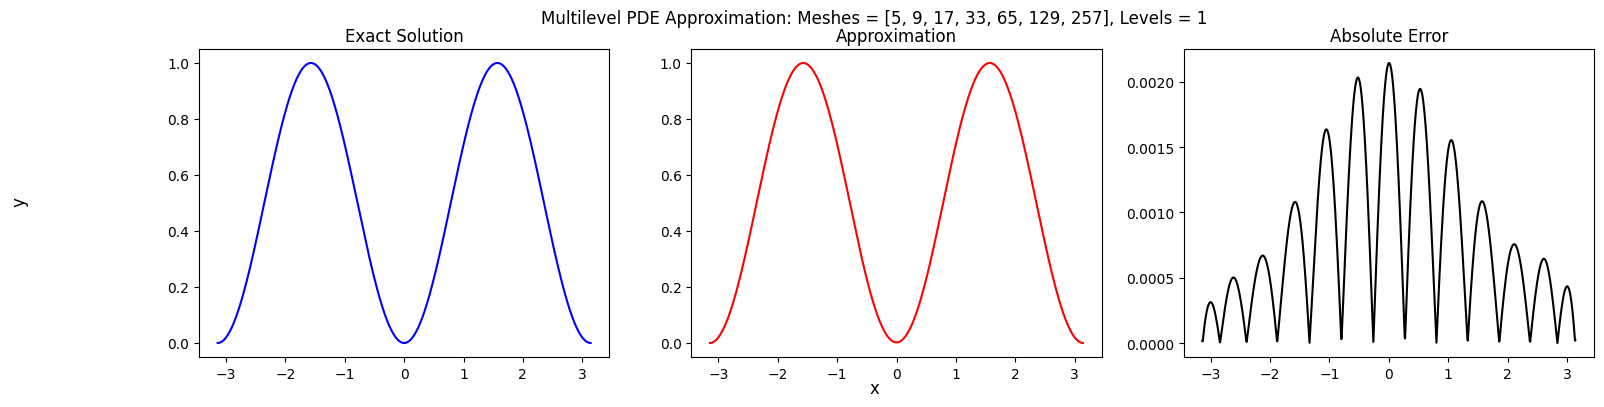

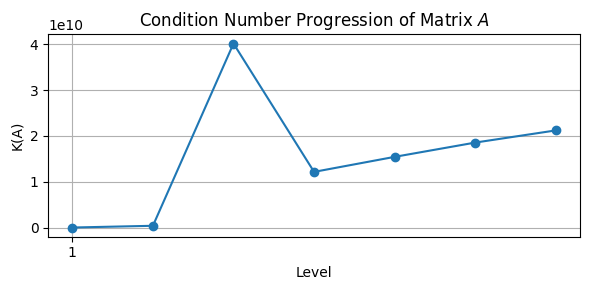

Start Time: 1713348374.557627
End Time: 1713348454.211377
Initialization Time: 13.30464792251587
Elapsed Time: 92.95839786529541 seconds


In [11]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5,9,17,33,65,129,257], 10, 1
ml = efoned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann')
ml.multilevel(u, 1000)

## Non-Overlapping Centers for Accuracy

### $u(x) = \sin^2(x)$

In [4]:
def f(x):
    return 3 * (np.sin(x))**2 - 2 * (np.cos(x))**2

def u(x):
    return np.sin(x)**2

def u_prime(x):
    return 2*np.sin(x)*np.cos(x)

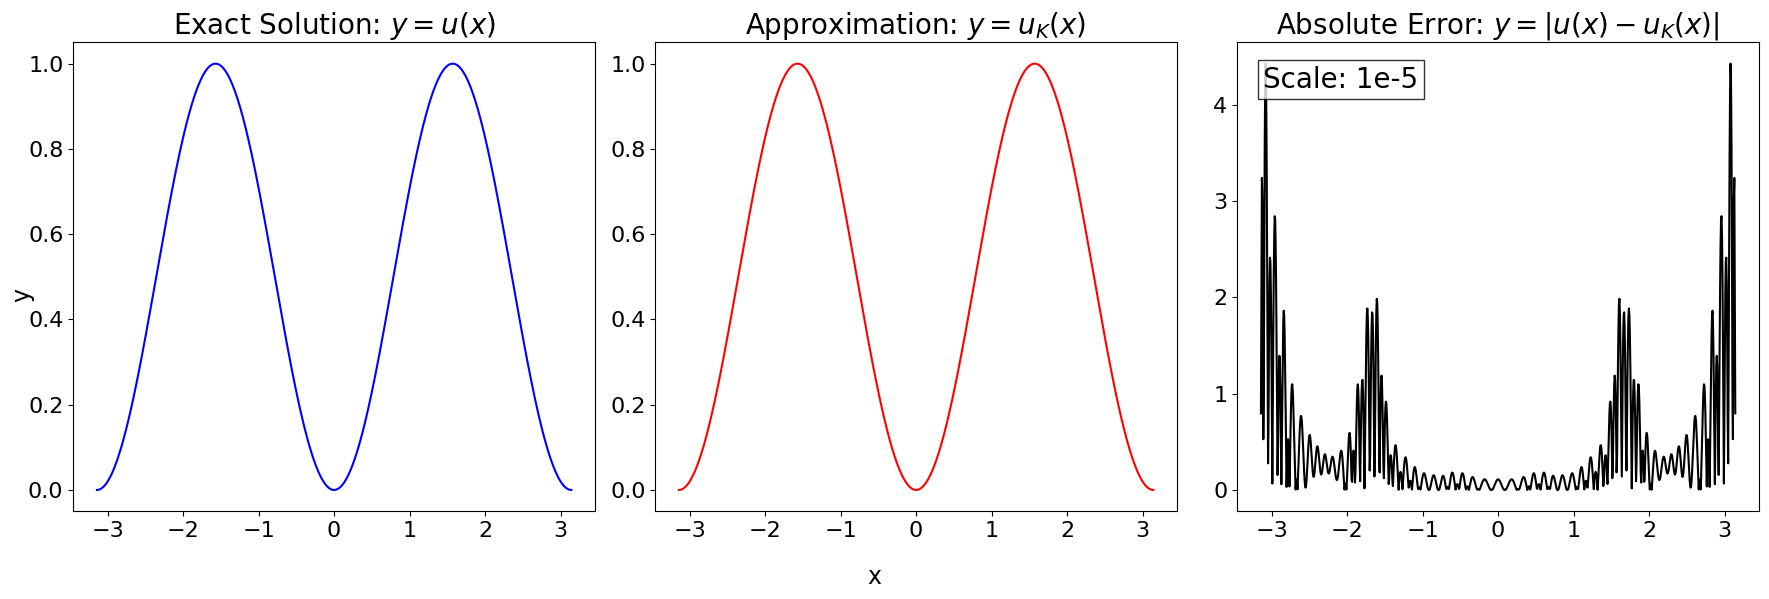

In [6]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [4, 8,16, 32, 64, 128], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000)

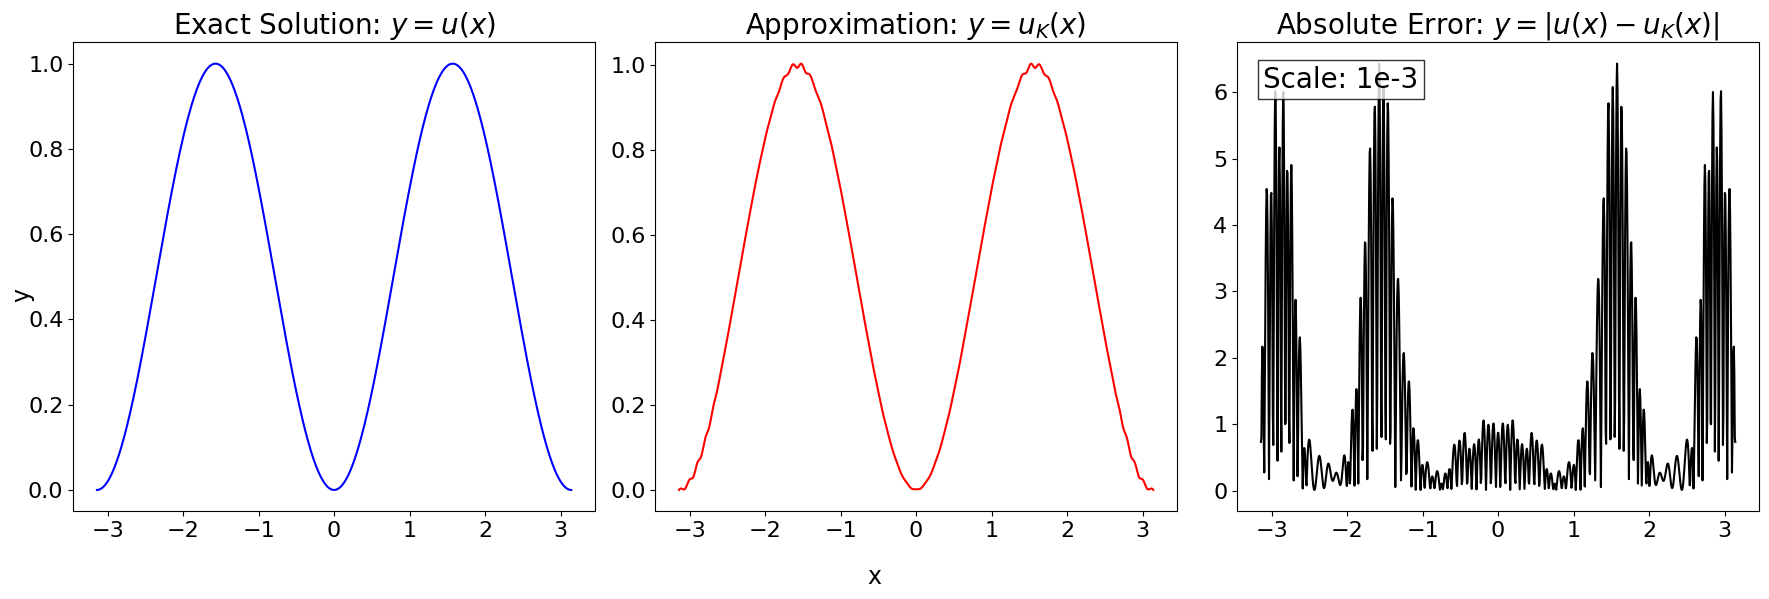

In [7]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [5, 9,17, 33, 65, 129], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u_prime, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000)

### $u(x,y) = \frac{\cos(\pi x) \cos(\pi y)}{2 \pi^2 + 1}$

In [17]:
f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)

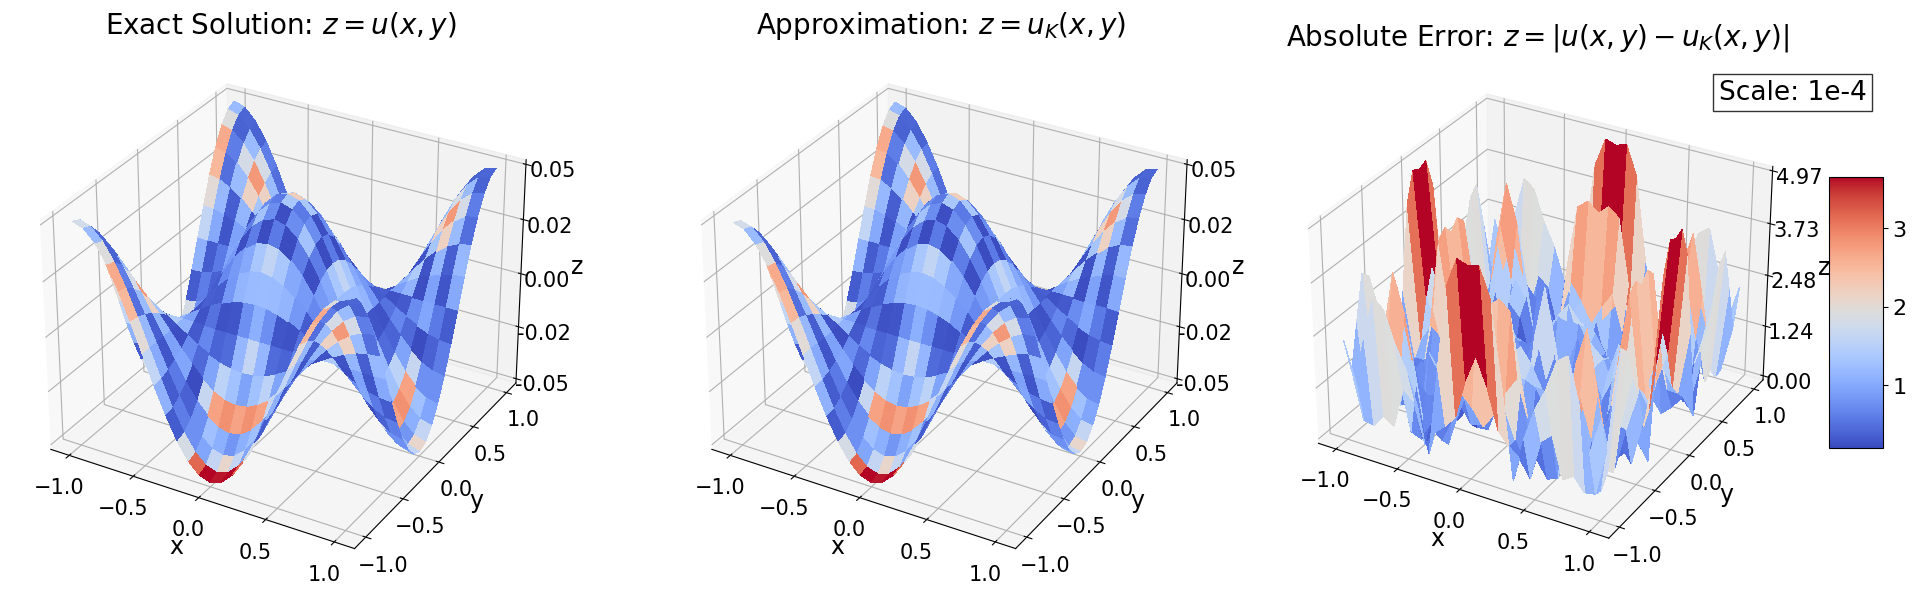

In [8]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [16, 121], 4
outer = 1

def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='galerkin', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

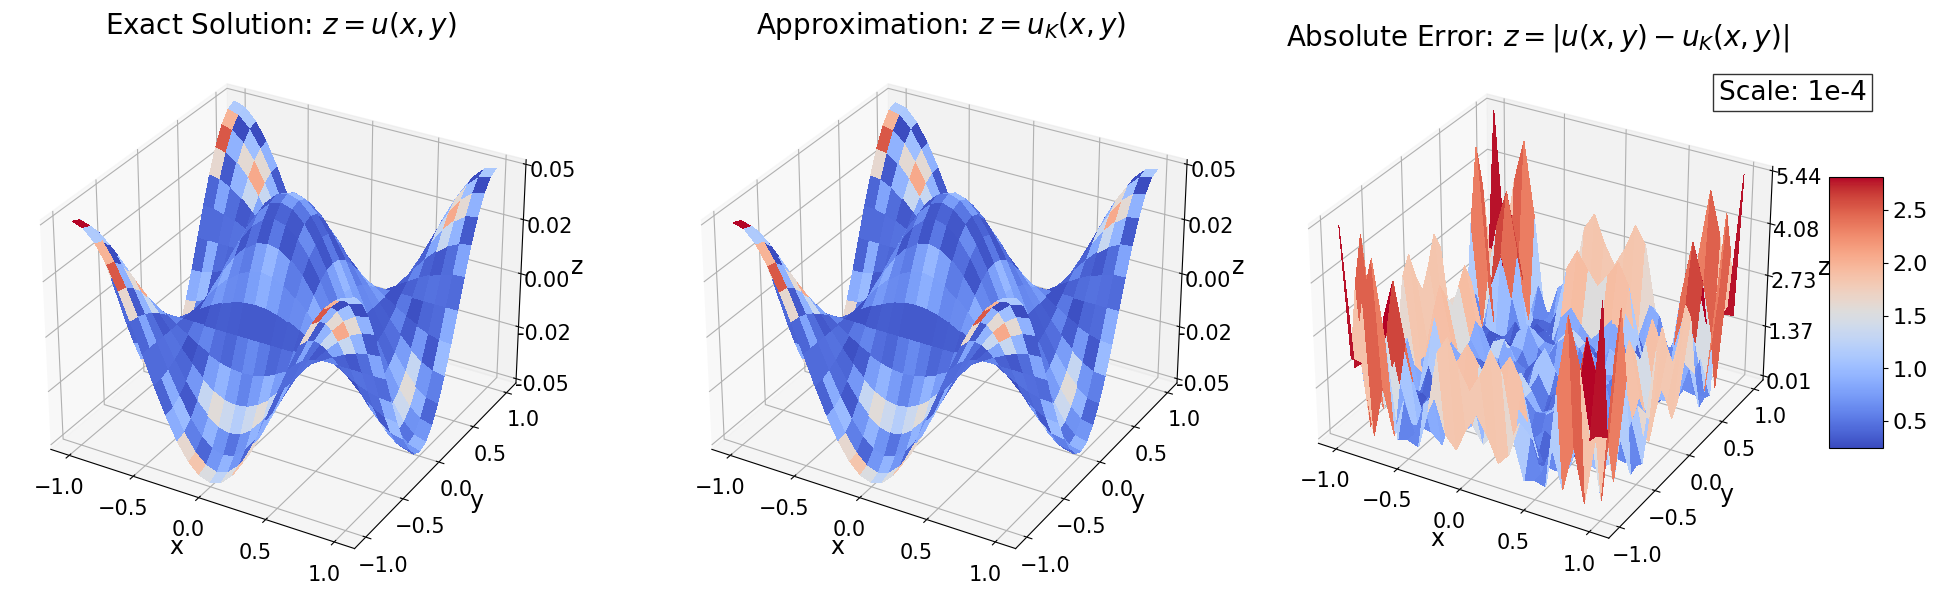

In [10]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [25, 121], 4
outer = 1

def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='galerkin', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

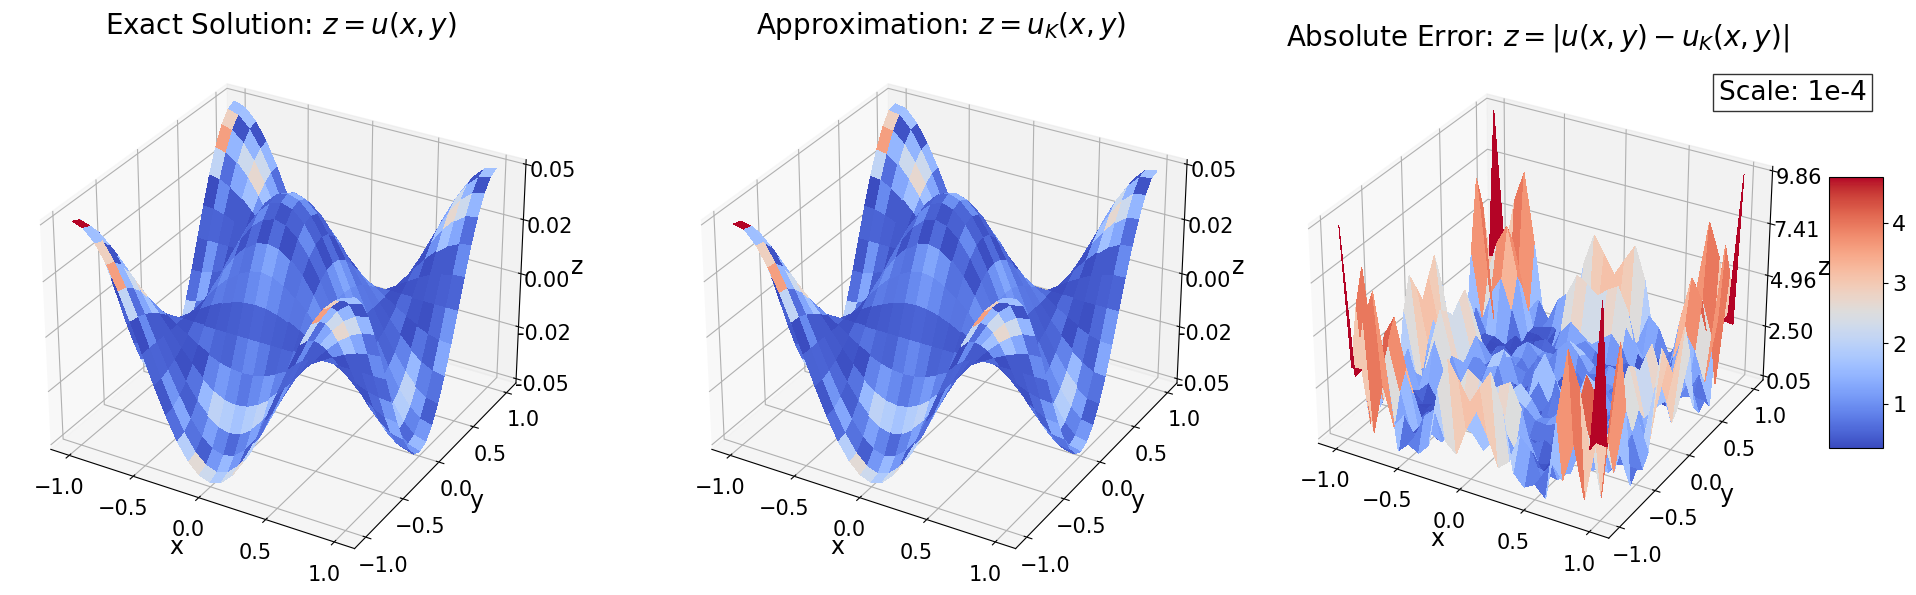

In [18]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [36, 121], 4
outer = 1

def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='galerkin', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

# Chapter 5

## Grids

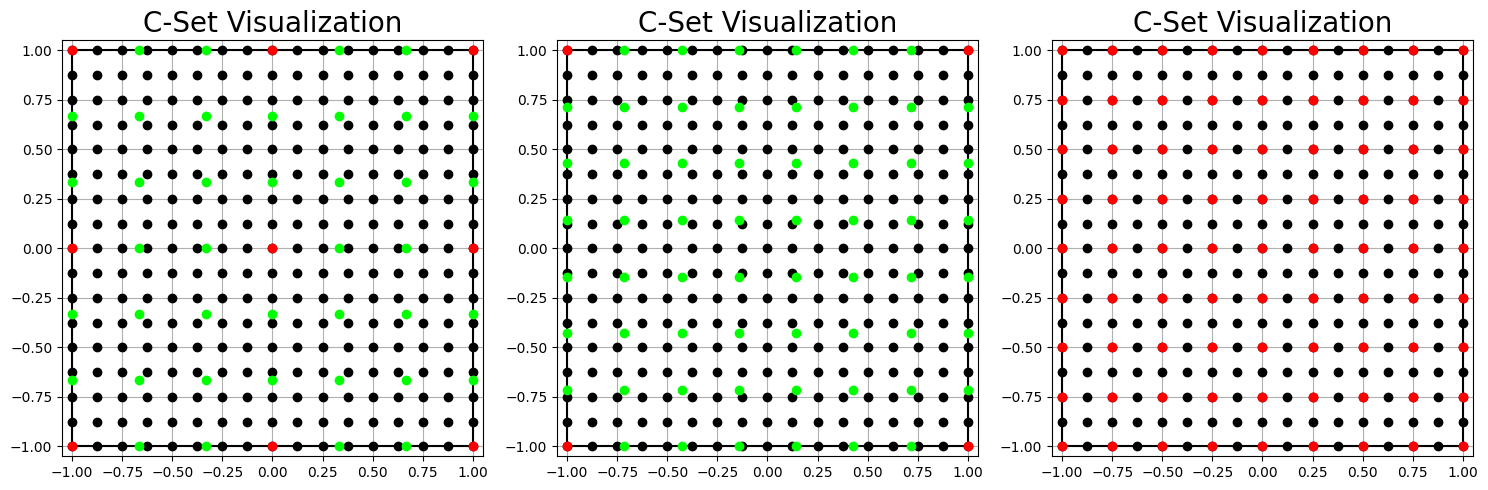

In [41]:
# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each subplot
for i, ax in enumerate(axs):
    # Plot the grid
    width = 16/2
    ticks = [-1 + j/width for j in range(int(2*width)+1)]
    
    # Set x and y limits
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)

    ax.plot([-1, 1], [-1, -1], color='black')  # Horizontal line
    ax.plot([1, 1], [-1, 1], color='black')  # Vertical line
    ax.plot([-1, 1], [1, 1], color='black')  # Horizontal line
    ax.plot([-1, -1], [-1, 1], color='black')  # Vertical line

    for n in range(len(ticks)):
        for m in range(len(ticks)):
            ax.plot(ticks[n], ticks[m], marker='o', color='black')

    if i == 0:
        w = 6/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                x, y = t[n], t[m]
                if (x==1 and y==1) or (x==1 and y==-1) or (x==-1 and  y==-1) or (x==-1 and y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                elif (x==0 and y==0) or (x==0 and y==-1) or (x==0 and  y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                elif (x==-1 and y==0) or (x==1 and  y==0):
                    ax.plot(t[n], t[m], marker='o', color='red')
                else:
                    ax.plot(t[n], t[m], marker='o', color='lime')
    if i ==1:
        w = 7/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                x, y = t[n], t[m]
                if (x==1 and y==1) or (x==1 and y==-1) or (x==-1 and  y==-1) or (x==-1 and y==1):
                    ax.plot(t[n], t[m], marker='o', color='red')
                else:
                    ax.plot(t[n], t[m], marker='o', color='lime')
        
    if i ==2:
        w = 8/2
        t = [-1 + j/w for j in range(int(2*w)+1)]
        for n in range(len(t)):
            for m in range(len(t)):
                ax.plot(t[n], t[m], marker='o', color='red')
    
    # Hide axes
    ax.axis('on')
    ax.set_xticks(ticks[::2])
    ax.set_yticks(ticks[::2])
    ax.set_title('C-Set Visualization', fontsize=20)
    
    # Show grid
    ax.grid(True)

plt.tight_layout()
plt.show()

## Application to Kansa

### $u(x) = \sin^2(x)$

In [24]:
def f(x):
    return 3 * (np.sin(x))**2 - 2 * (np.cos(x))**2

def u(x):
    return np.sin(x)**2

def u_prime(x):
    return 2*np.sin(x)*np.cos(x)

#### Neumann

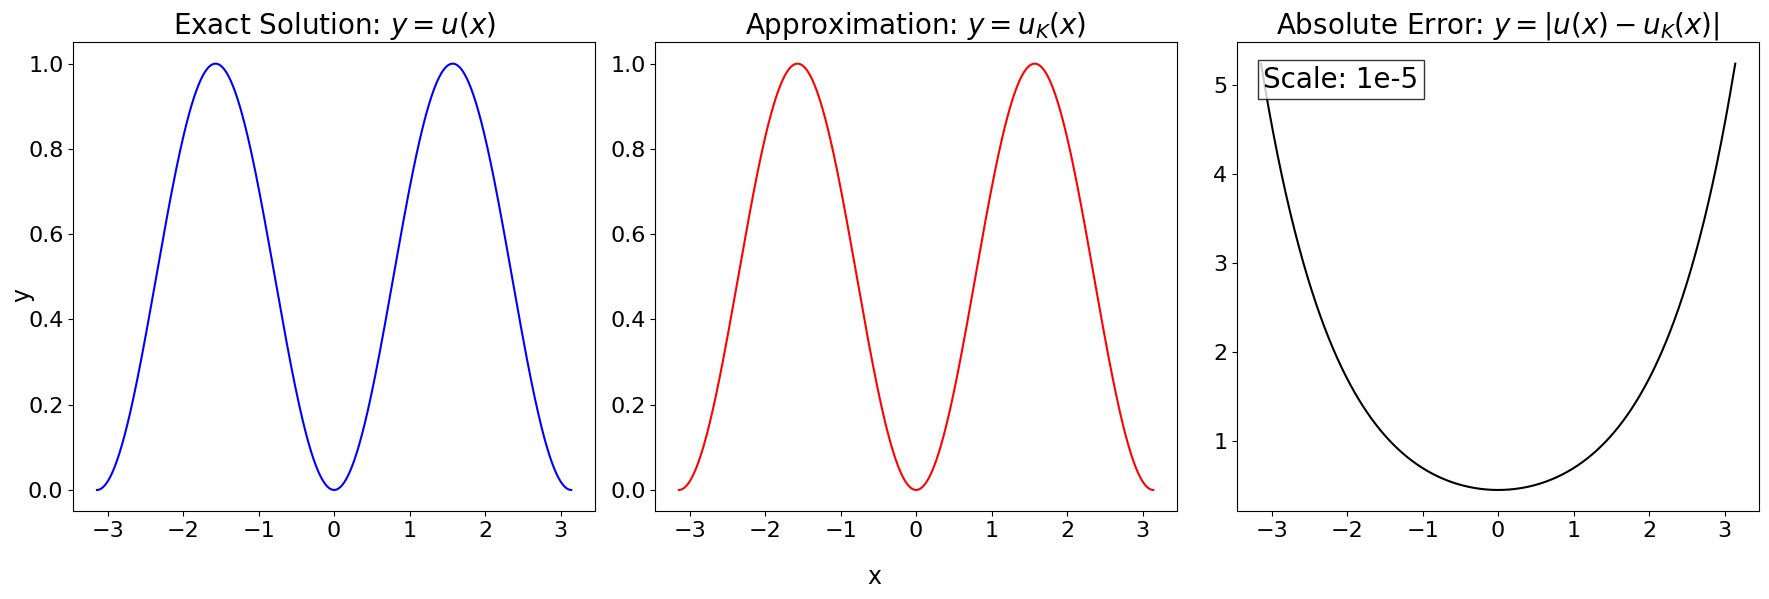

In [29]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [128,256,512,1024], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u_prime, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True)

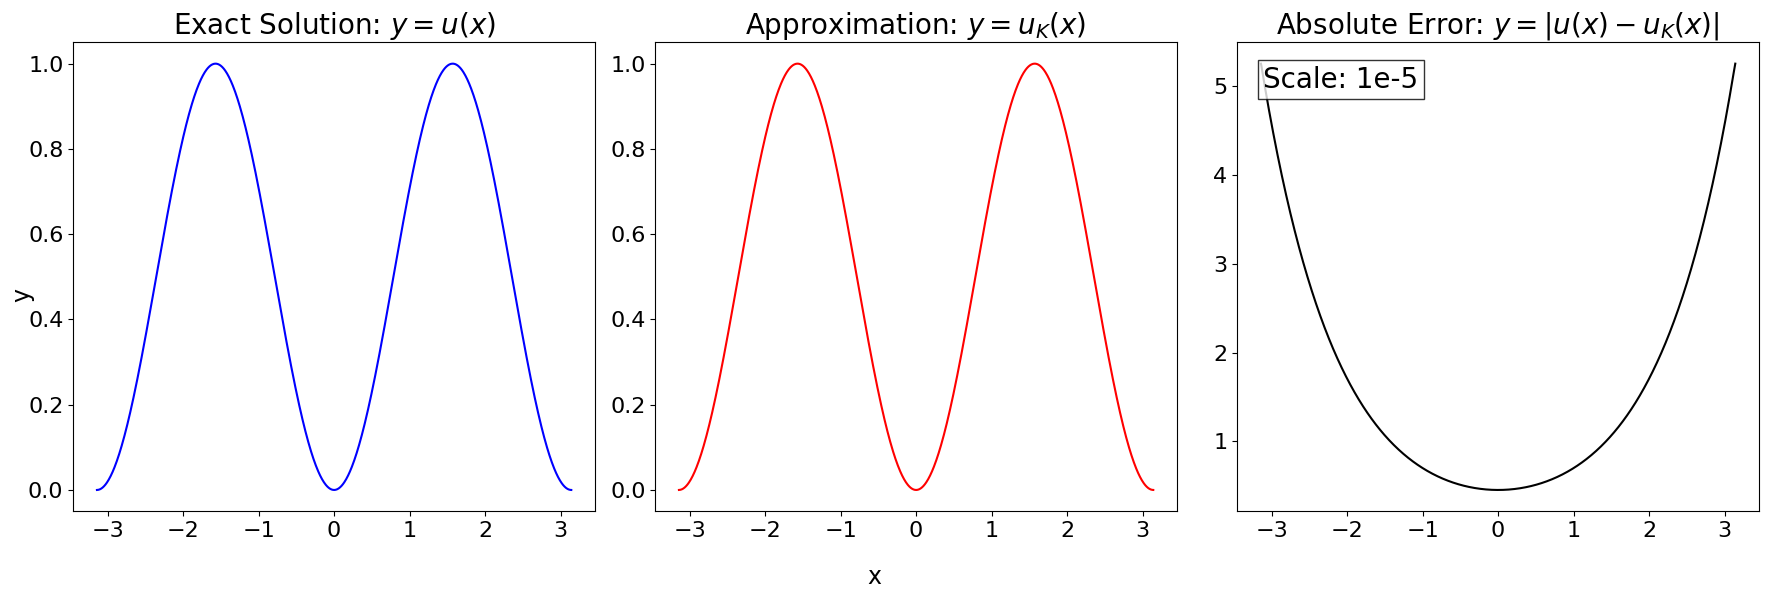

In [30]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [129,257,513,1025], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u_prime, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True)

#### Dirichlet

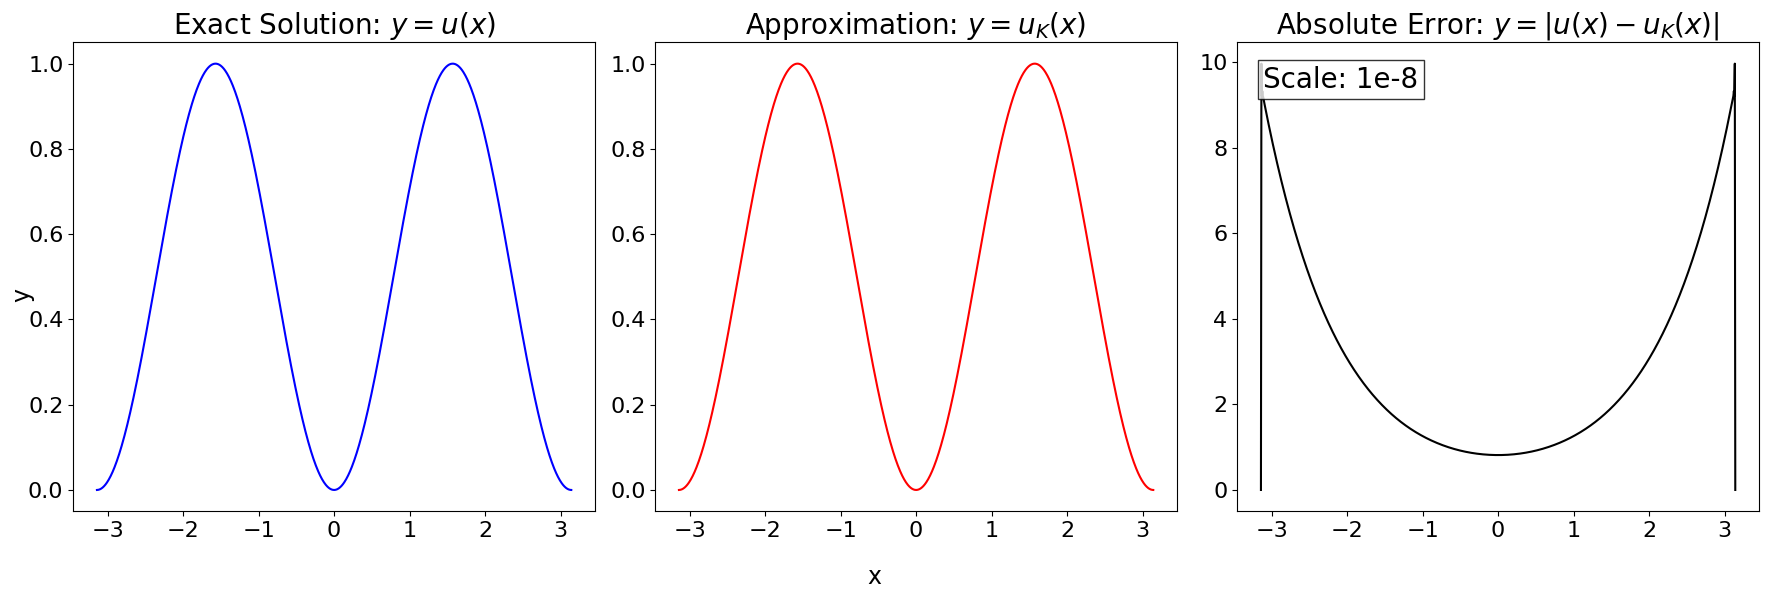

In [31]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [128,256,512,1024], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True)

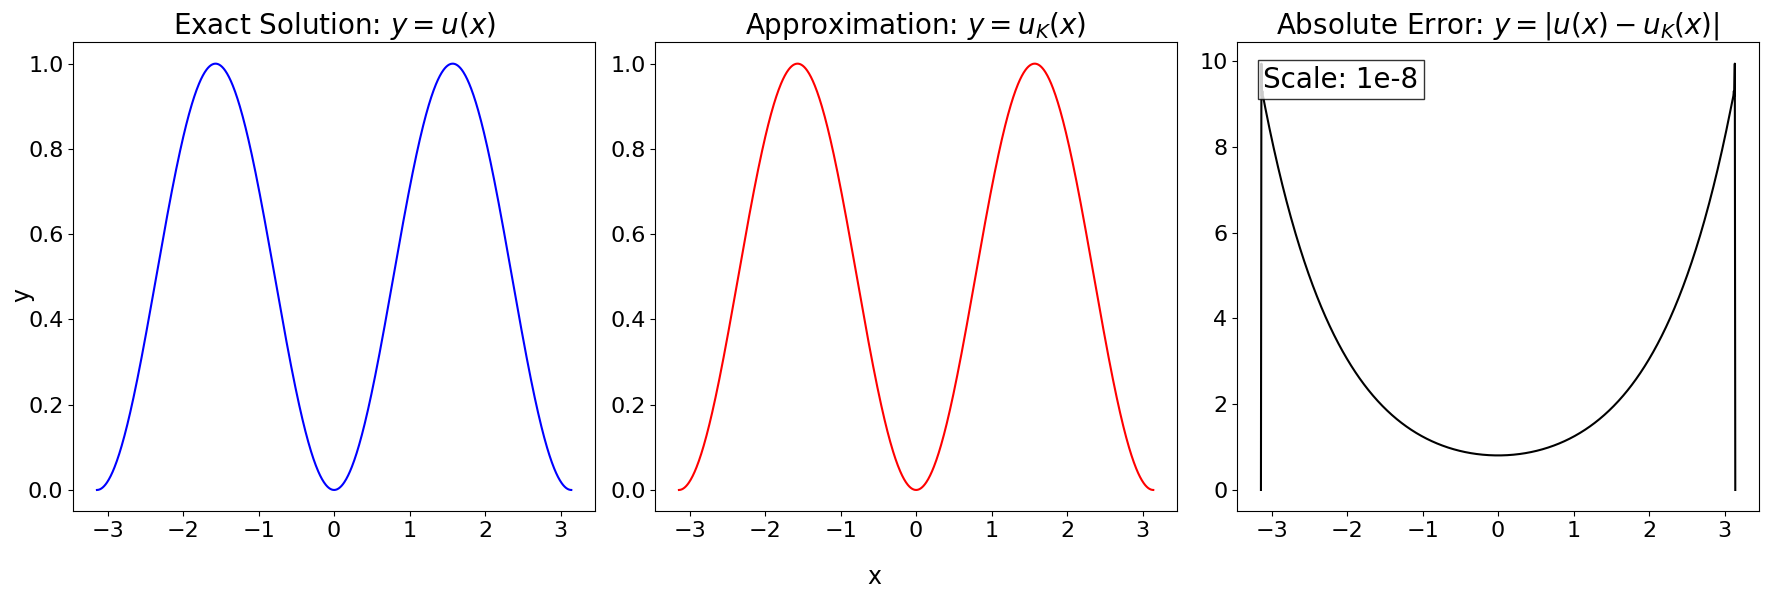

In [32]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [129,257,513,1025], 10, 3
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, show_errs=True)

### $u(x,y) = \frac{\cos(\pi x) \cos(\pi y)}{2 \pi^2 + 1}$

#### Neumann

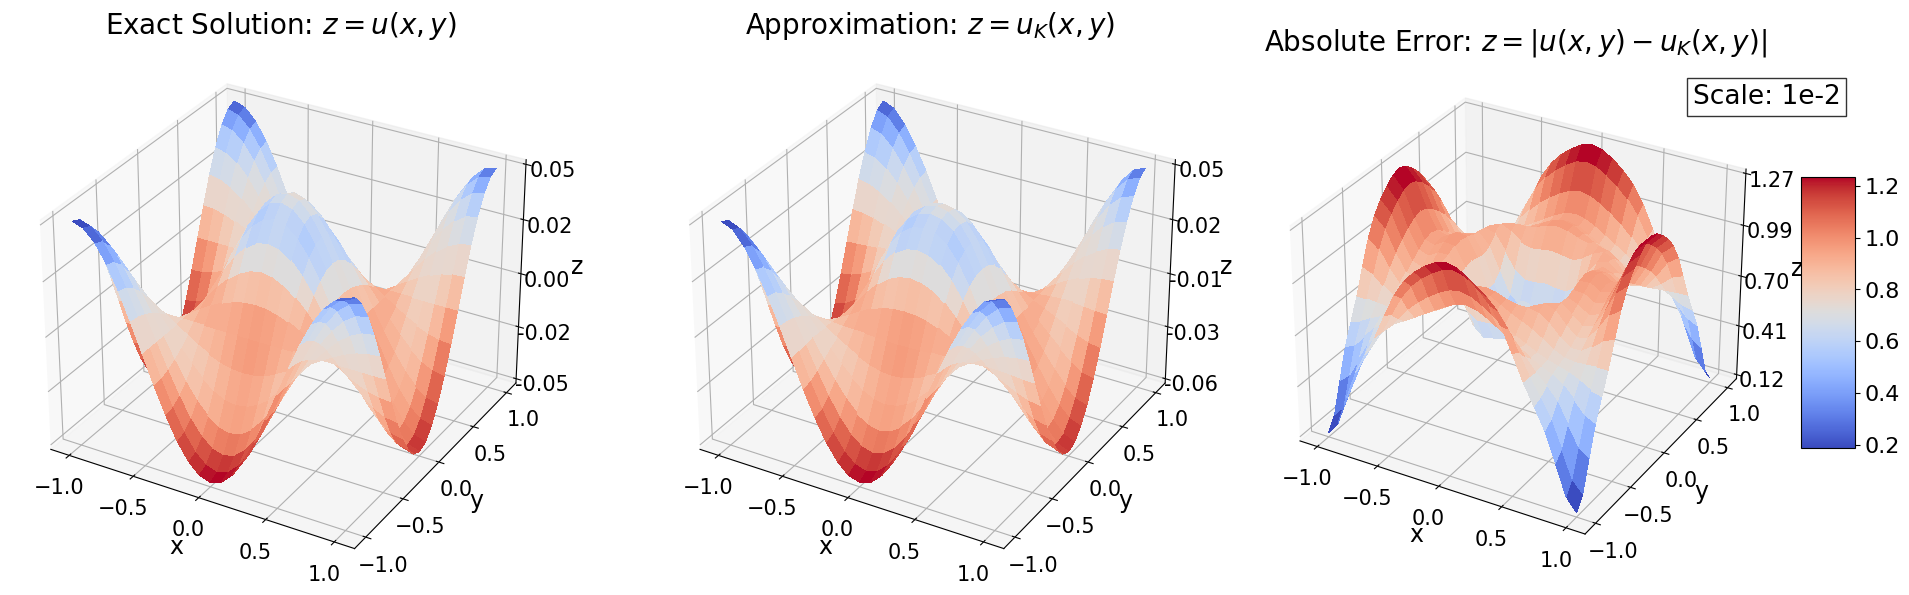

In [23]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [81,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ux = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*x)*np.cos(np.pi*y))
uy = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*y)*np.cos(np.pi*x))
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='collocation', Fx=ux, Fy=uy, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

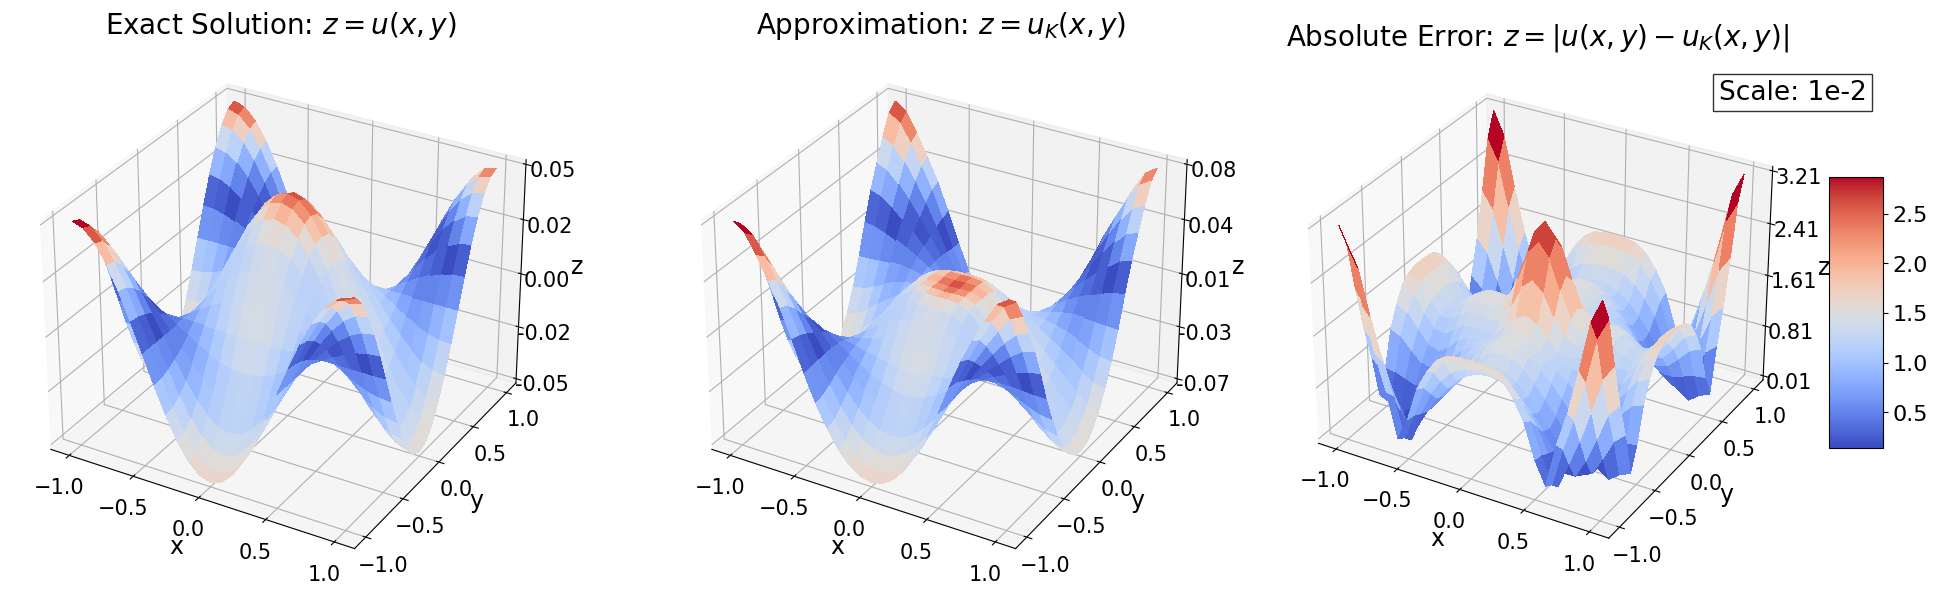

In [22]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [64,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ux = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*x)*np.cos(np.pi*y))
uy = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*y)*np.cos(np.pi*x))
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='collocation', Fx=ux, Fy=uy, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

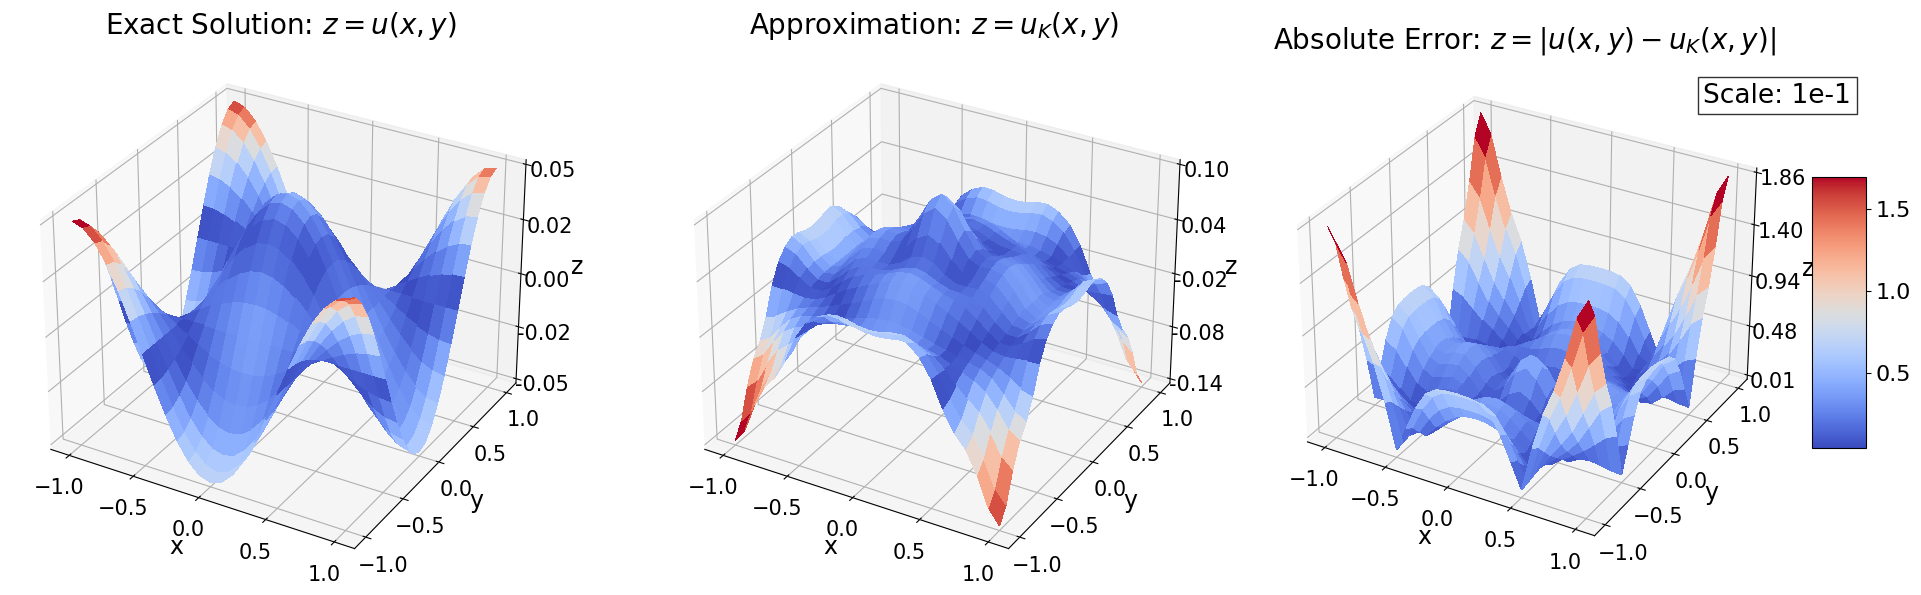

In [21]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [49,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ux = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*x)*np.cos(np.pi*y))
uy = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*y)*np.cos(np.pi*x))
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='collocation', Fx=ux, Fy=uy, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

#### Dirichlet

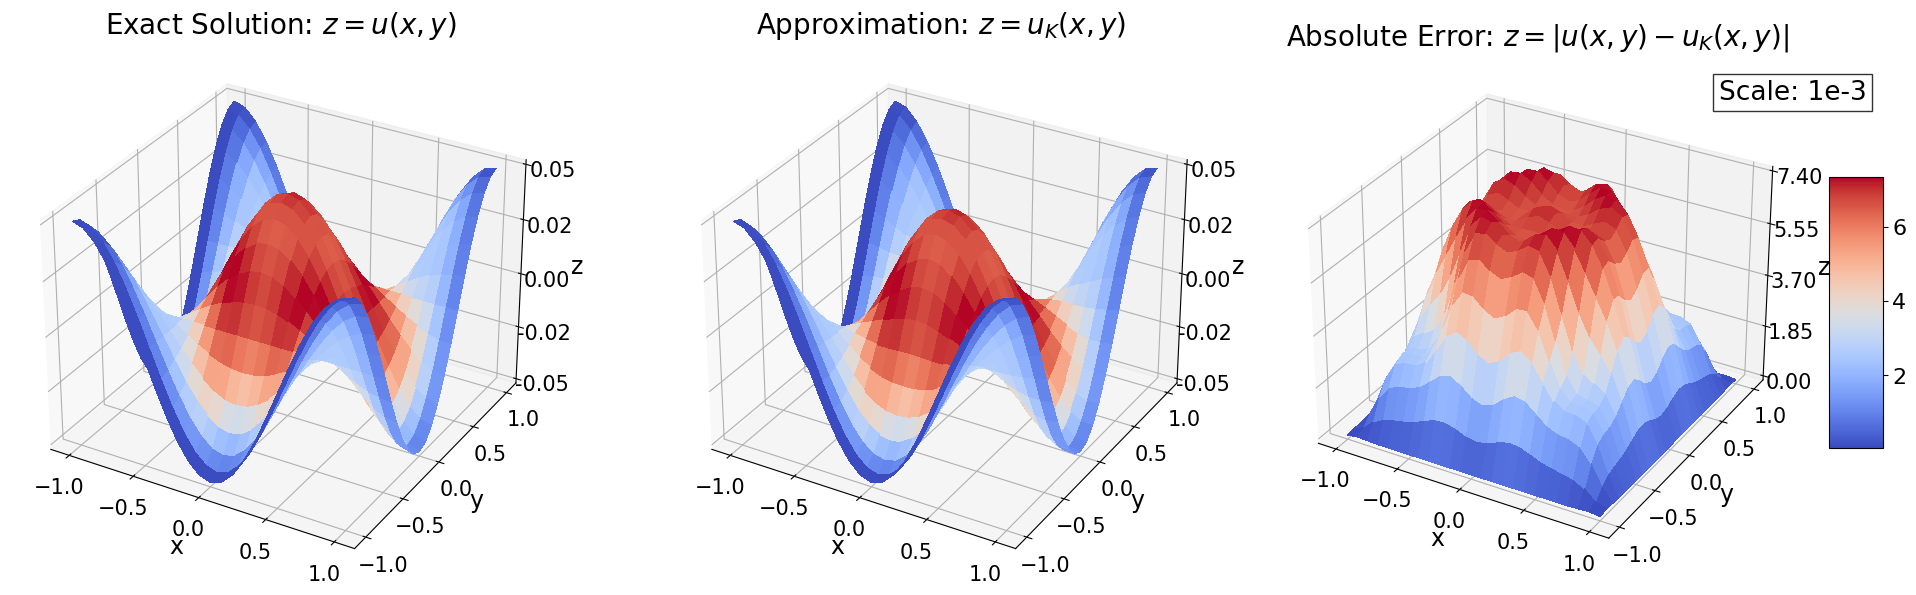

In [33]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [81,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='dirichlet', app_type='collocation', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

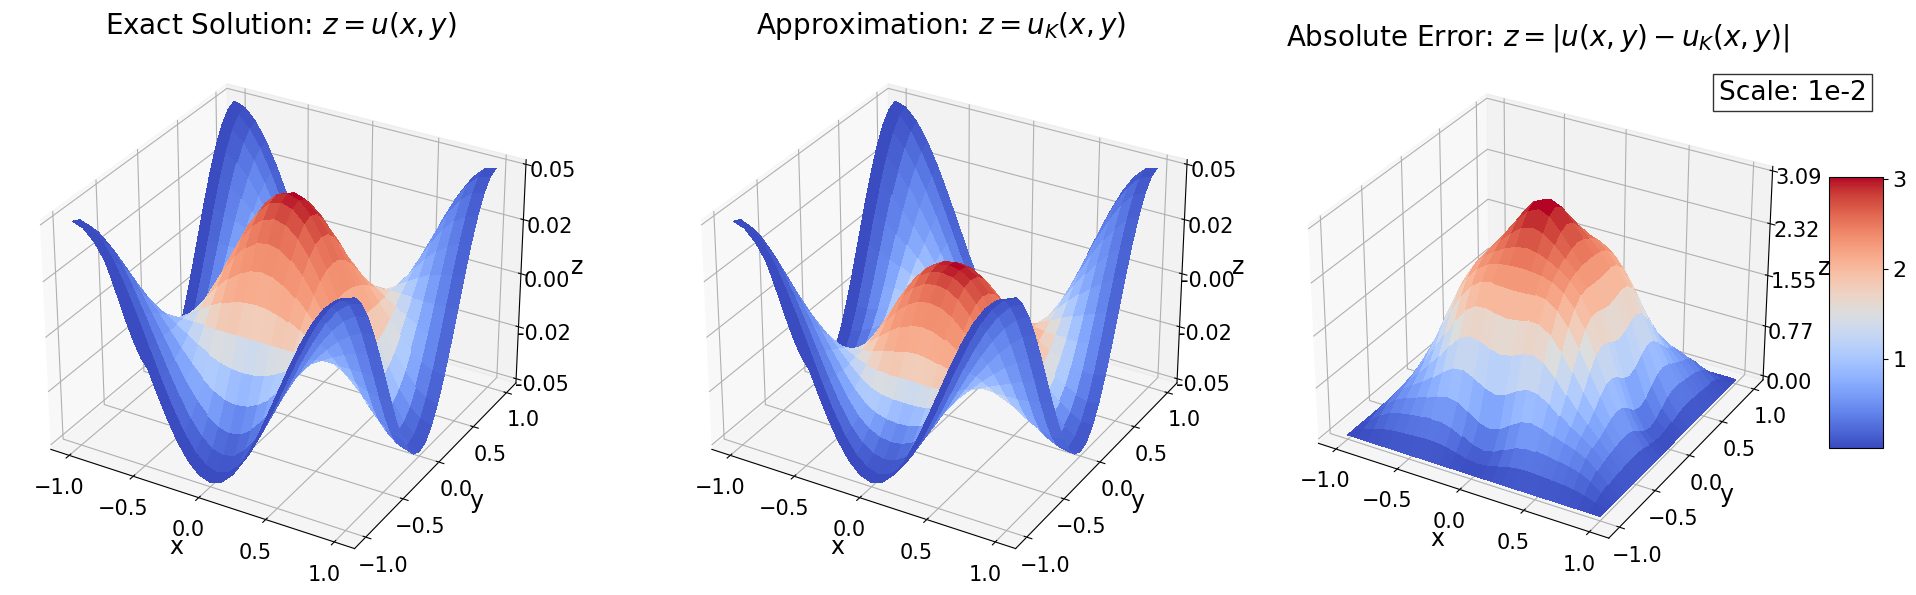

In [36]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [64,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='dirichlet', app_type='collocation', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

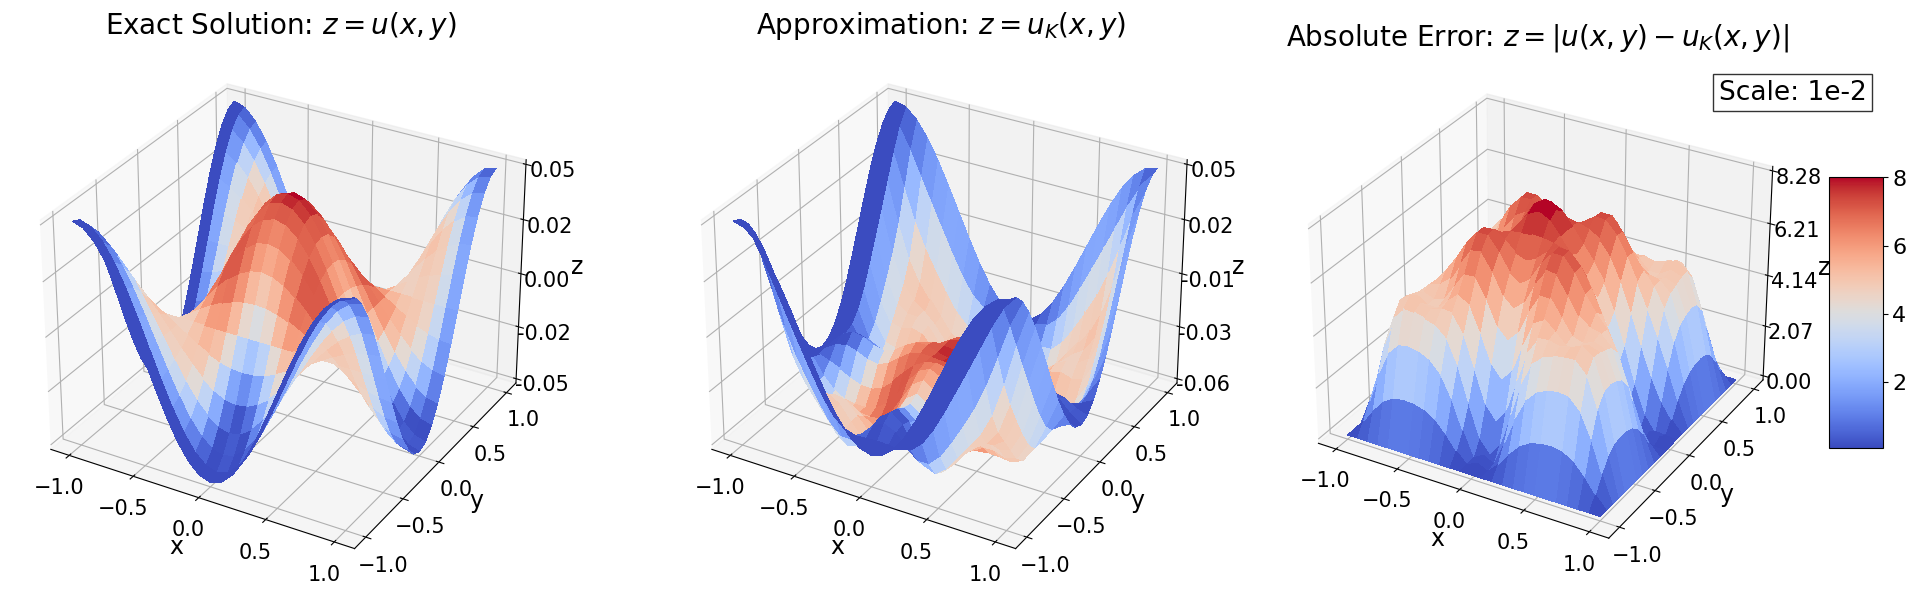

In [37]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [49,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='dirichlet', app_type='collocation', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

## Galerkin Advantage on Coarse Sets

### $\mathcal{N} = \{4,5\}$

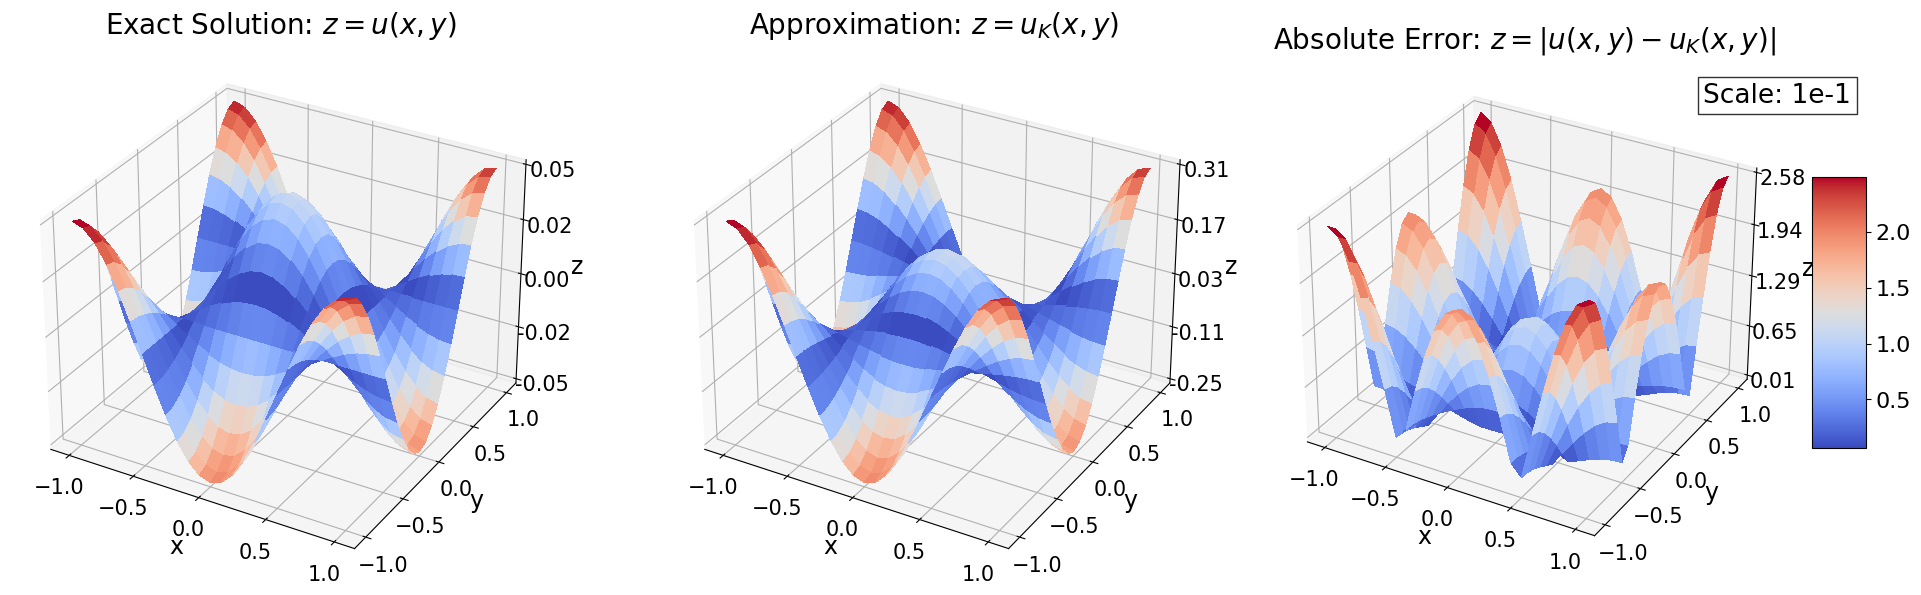

In [11]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [16,25], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ux = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*x)*np.cos(np.pi*y))
uy = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*y)*np.cos(np.pi*x))
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='collocation', Fx=ux, Fy=uy, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

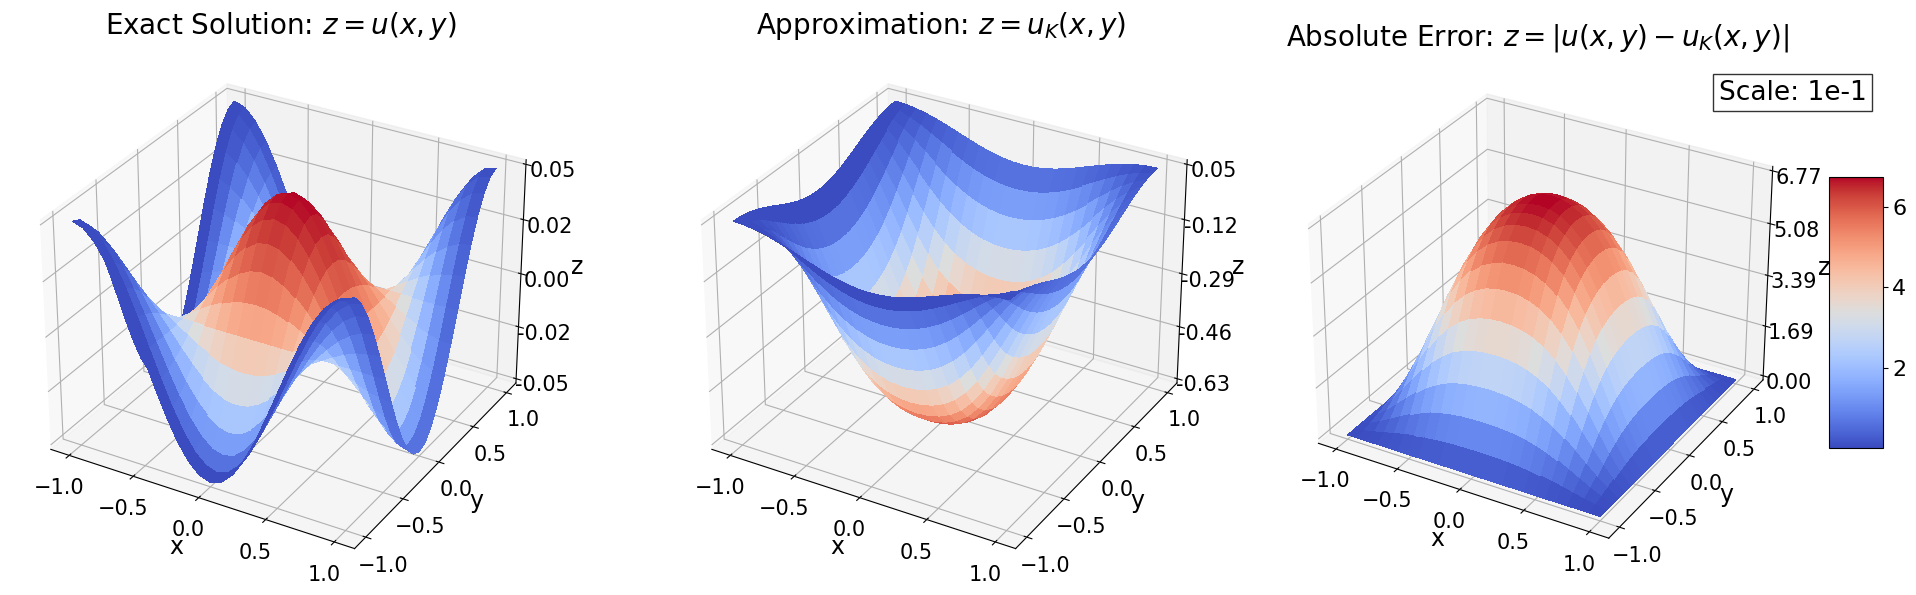

In [13]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [16,25], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='dirichlet', app_type='collocation', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

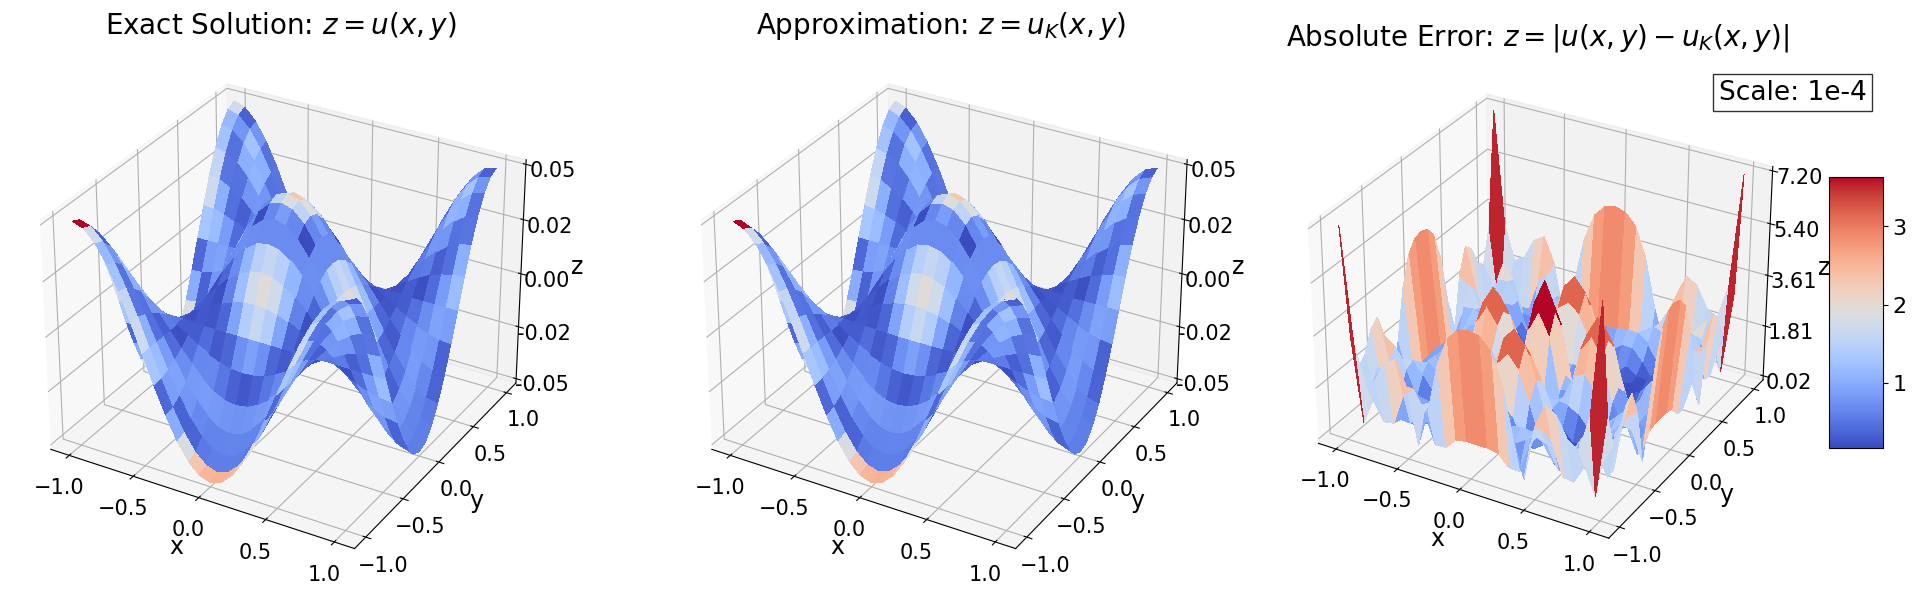

In [14]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [16,25], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='galerkin', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

### $\mathcal{N} = \{9,11,17\}$

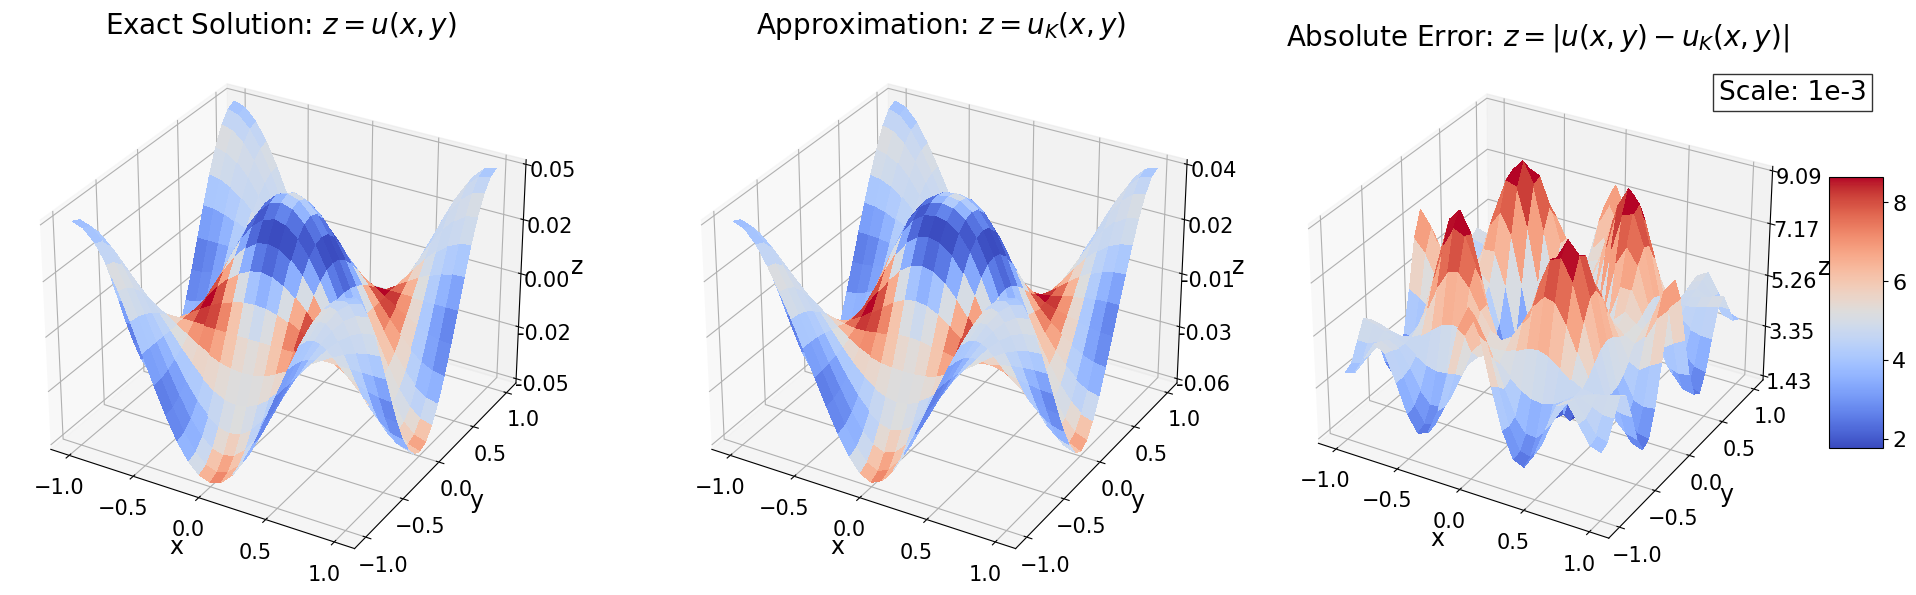

In [15]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [81,121,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ux = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*x)*np.cos(np.pi*y))
uy = lambda x, y: ((-1 * np.pi)/(2*(np.pi**2)+1)) * (np.sin(np.pi*y)*np.cos(np.pi*x))
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='neumann', app_type='collocation', Fx=ux, Fy=uy, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

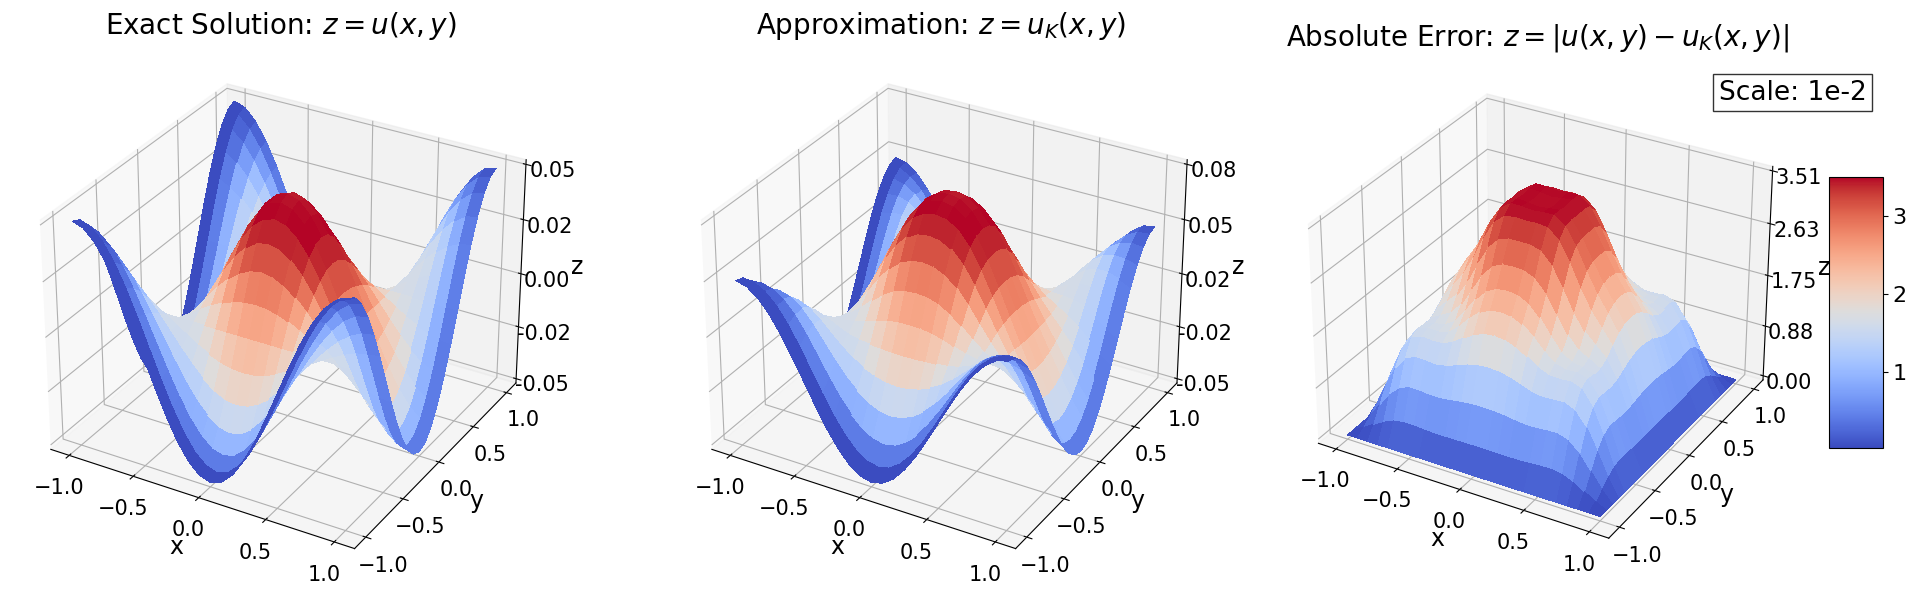

In [16]:
a, b, c, d, Ns, delta = -1, 1, -1, 1, [81,121,289], 10
outer = 1
def boundary(ctr):
    x, y = ctr
    if x == a or x == b:
        return True
    elif y == c or y == d:
        return True
    else:
        return False

f = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y)
u = lambda x, y: np.cos(np.pi*x) * np.cos(np.pi*y) / (2*(np.pi**2)+1)
ml = twod(a, b, c, d, f, Ns, delta, outer, boundary, bc_type='dirichlet', app_type='collocation', F=u, scale_delta=True)
_ = ml.multilevel(u, 25, show_errs=True)

# Chapter 6

### $u(x) = \sin^2(x)\cos(x)$

In [2]:
def f(x):
    return -2*(np.cos(x)**3) + 8*(np.sin(x)**2)*(np.cos(x))

def u(x):
    return (np.sin(x)**2)*np.cos(x)

def ux(x):
    return 2*(np.sin(x))*(np.cos(x)**2) - (np.sin(x)**3)

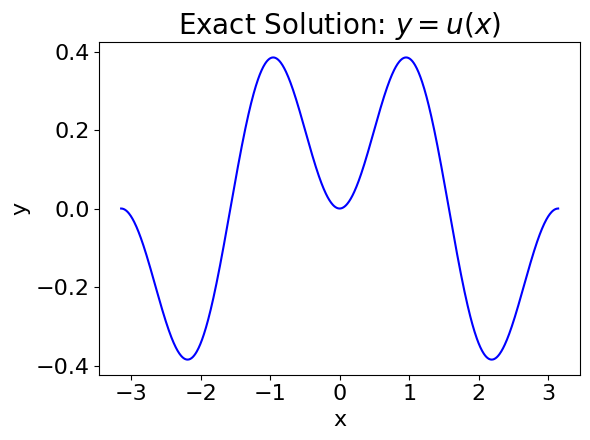

In [3]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [16,64,256], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='true only')

#### Kansa, Dirichlet

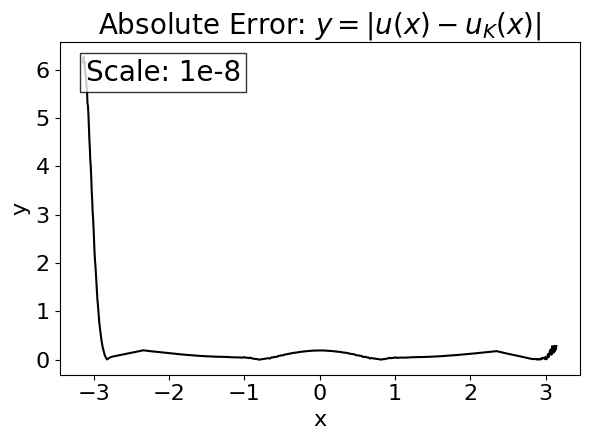

In [4]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [16,64,256], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

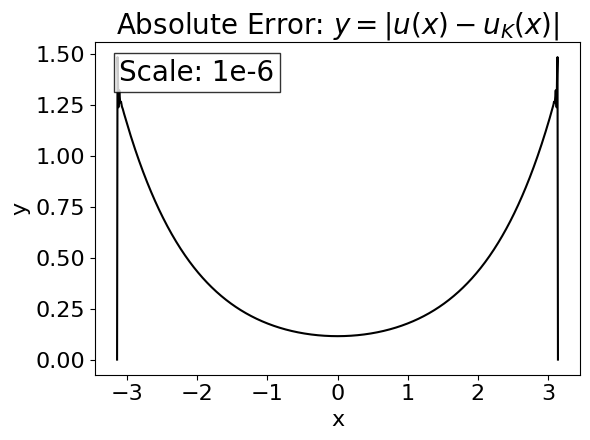

In [5]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [31,127,511], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

#### Kansa, Neumann

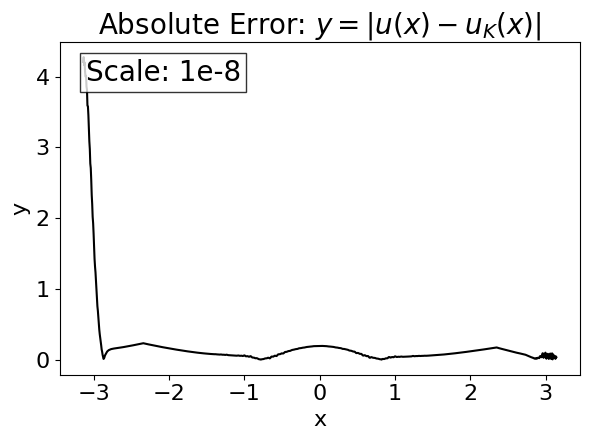

In [6]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [16,64,256], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

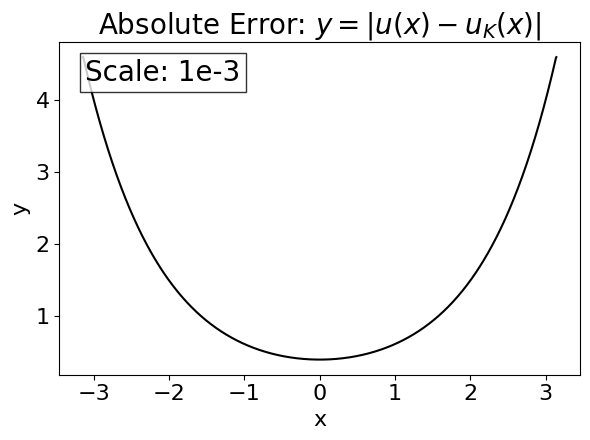

In [7]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [31,127,511], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

#### Galerkin

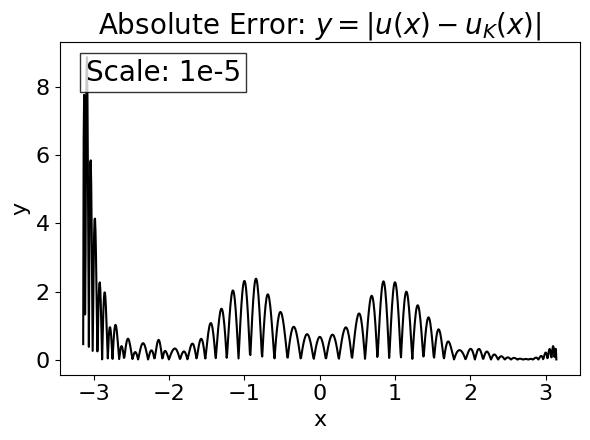

In [8]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [8,16,32], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=ux, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

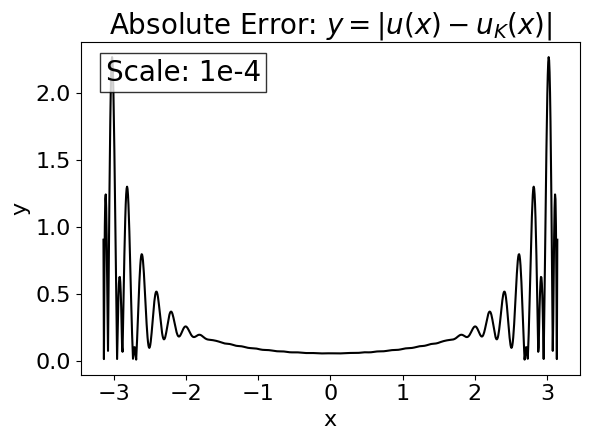

In [9]:
a, b, Ns, delta, outer = -1 * np.pi, 1 * np.pi, [15,31,63], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

### $u(x) = \sin(x)\cos(x) - \sin^2(x)\cos(x)$

In [10]:
def u(x):
    return (np.sin(x)*np.cos(x)) - ((np.sin(x)**2)*np.cos(x))

def f(x):
    v = (np.sin(x)*np.cos(x)) - ((np.sin(x)**2)*np.cos(x))
    vxx = ((np.sin(x))*(7*np.sin(x) - 4)*(np.cos(x))) - (2*(np.cos(x)**3))
    return v - vxx

def ux(x):
    ft = (np.sin(x)-1) * (np.sin(x)**2)
    st = (1-2*np.sin(x)) * (np.cos(x)**2)
    return ft + st

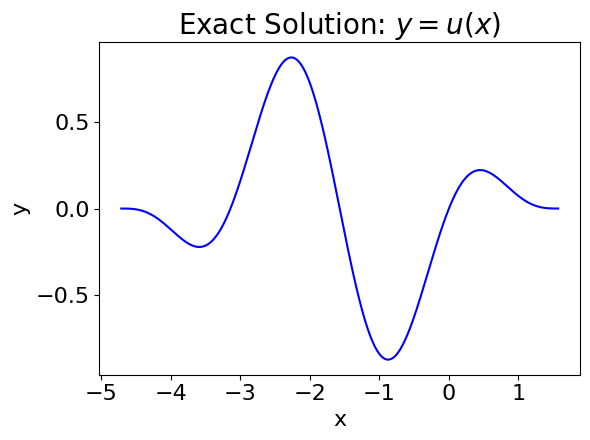

In [13]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [16,64,256], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='true only')

#### Kansa, Dirichlet

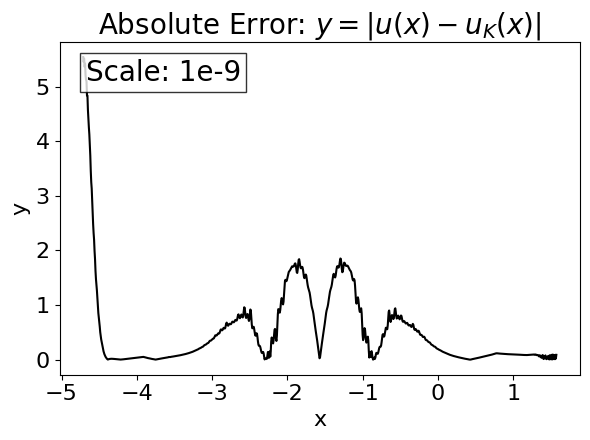

In [15]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [16,64,256], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

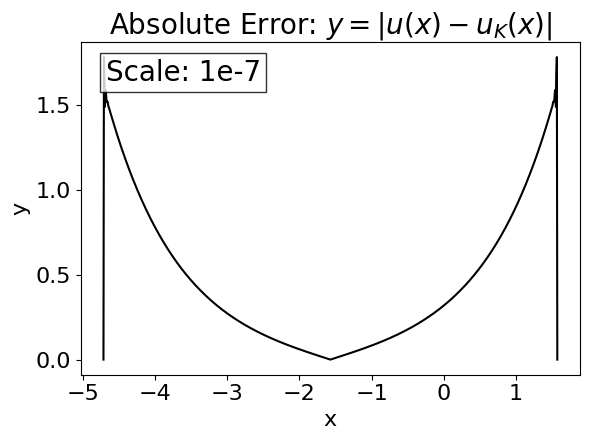

In [16]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [31,127,511], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=u, app_type='collocation', bc_type='dirichlet', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

#### Kansa, Neumann

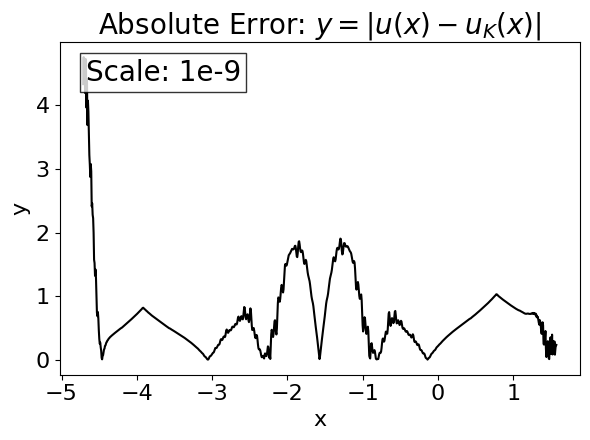

In [17]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [16,64,256], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

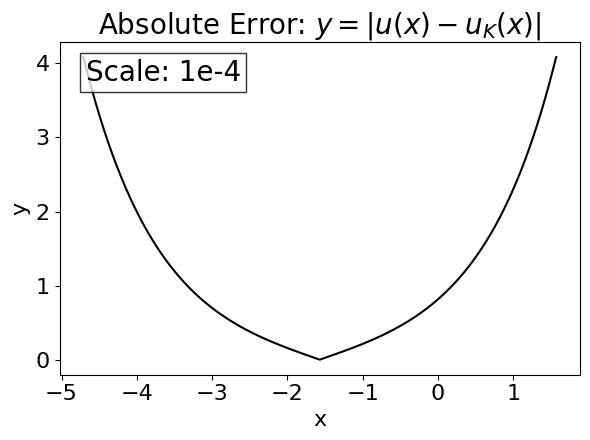

In [18]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [31,127,511], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='collocation', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

#### Galerkin

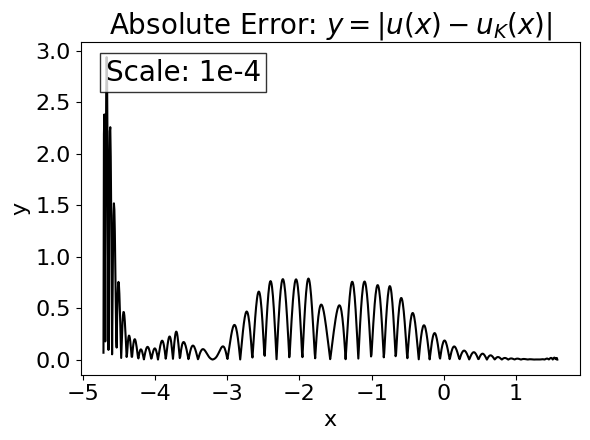

In [19]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [8,16,32], 10, 1
ml = ada(a, b, f, Ns, delta, outer, F=ux, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)

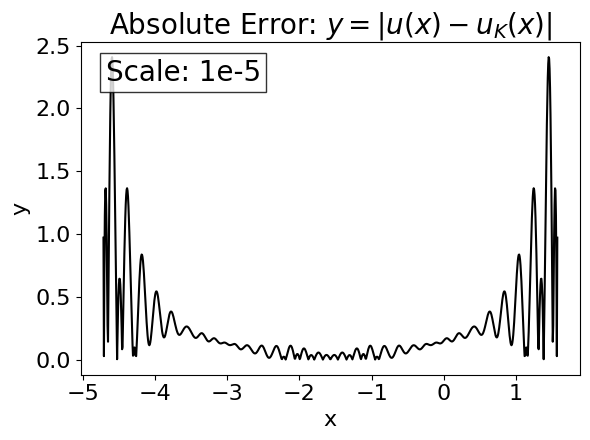

In [20]:
a, b, Ns, delta, outer = -3 * np.pi/2, np.pi/2, [15,31,63], 10, 1
ml = oned(a, b, f, Ns, delta, outer, F=ux, app_type='galerkin', bc_type='neumann', scale_delta=True)
_ = ml.multilevel(u, 1000, plots='error only', show_errs=True)